<a href="https://colab.research.google.com/github/AceRb6/Procesamiento_de_Lenguaje_Natural/blob/main/PL1_Pt2_Unidad2_PLN_Manuel_Garcia_Venegas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Práctica 1 Pt.1: Asociación de Palabras con Coocurrencias y Similitud de Jaccard**

## Alumnos:
* Cano Portugal Israel Daniel Arturo
* Garcia Venegas Manuel

!IMPORTANTE INSTALAR Y REINICIAR LA SESION PARA EVITAR ERRORES, CON EL PRIMER REINICIO DE SESION YA SE PUEDE AVANZAR SIN NECESIDAD DE VOLVER A REINICIAR DESPUES DE LA INSTALACION DE  **TORCH**¡

In [ ]:
!pip install word2vec

In [ ]:
!pip install gensim

In [ ]:
#  Volver a instalar gensim y evitar conflictos
!pip install --upgrade --force-reinstall gensim==4.3.0

  Using cached gensim-4.3.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.4 kB)
  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached smart_open-7.1.0-py3-none-any.whl.metadata (24 kB)
  Using cached FuzzyTM-2.0.9-py3-none-any.whl.metadata (7.9 kB)
  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached pyFUME-0.3.4-py3-none-any.whl.metadata (9.7 kB)
  Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached scipy-1.10.1-cp31

In [ ]:
!pip install --upgrade --force-reinstall torch
!pip install --upgrade --force-reinstall thinc confection spacy

  Using cached setuptools-80.3.1-py3-none-any.whl.metadata (6.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 112.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 91.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 MB

  Using cached setuptools-80.3.1-py3-none-any.whl.metadata (6.5 kB)
  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.6/66.6 kB 6.0 MB/s eta 0:00:00
  Using cached packaging-25.0-py3-none-any.whl.metadata (3.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 5.0 MB/s eta 0:00:00
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached typing_extensions-4.13.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached smart_open-7.1.0-py3-none-any.whl.metadata (24 kB)
  Using cached MarkupSafe-3.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.0 kB)
  Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 75.2 MB/s eta

**CUANDO LLEGUE A ESTE PUNTO LAS INSTALACIONES SE REINICIA**

##Parte 1: Palabras de Interés

A continuación, se proporciona un conjunto de palabras agrupadas por tema. Estas palabras
servirán como base para buscar asociaciones:

- Comida: comida, sabrosa, deliciosa, plato, rica, sabor, ensalada
- Servicio: servicio, atención, camarero, mesero, rápido, amable
- Ambiente: ambiente, luz, decoración, relajado, música
- Precio: precio, caro, barato, económico, costoso
- Ubicación: ubicación, cerca, lejos, accesible, centro

## Parte 2: Preprocesamiento del corpus

In [ ]:
import re
from nltk.corpus import stopwords
import nltk
import pandas as pd
import kagglehub
import unicodedata
import math

In [ ]:
path = kagglehub.dataset_download("d4rklucif3r/restaurant-reviews")

print("Path to dataset files:", path)

100%|██████████| 24.1k/24.1k [00:00<00:00, 28.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/d4rklucif3r/restaurant-reviews/versions/1


In [ ]:
# Consultar el dataset
df = pd.read_csv(path + "/Restaurant_Reviews.tsv", sep="\t")
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


### Analisis del dataset

Para este punto primero haremos visualizaciones especificas para ver que tan necesario seria normalizar y preparar el corpus para la tokenizacion por palabra

In [ ]:
# Textos con acentos
def count_accent_chars(text):
  count = 0
  for char in text:
    if unicodedata.category(char).startswith('L') and char not in 'abcdefghijklmnñopqrstuvwxyzABCDEFGHIJKLMNÑOPQRSTUVWXYZ':
      count += 1
  return count

df['accent_count'] = df['Review'].apply(count_accent_chars)

reviews_with_accents = df[df['accent_count'] > 0]
display(reviews_with_accents[['Review', 'accent_count']])

,Review,accent_count
150,My fiancé and I came in the middle of the day ...,1
598,I really enjoyed Crema Café before they expand...,1
823,The crêpe was delicate and thin and moist.,1
915,The only thing I wasn't too crazy about was th...,1


In [ ]:
# Visualizar textos con números
def has_numbers(text):
  return bool(re.search(r'\d', text))

reviews_with_numbers = df[df['Review'].apply(has_numbers)]
display(reviews_with_numbers[['Review']])

,Review
28,Took an hour to get our food only 4 tables in ...
30,"Also there are combos like a burger, fries, an..."
57,Not much seafood and like 5 strings of pasta a...
60,At least think to refill my water before I str...
70,"The deal included 5 tastings and 2 drinks, and..."
...,...
887,"After 20 minutes wait, I got a table."
936,The sangria was about half of a glass wine ful...
979,I kept looking at the time and it had soon bec...
985,The problem I have is that they charge $11.99 ...


Como primer paso ya consideramos quitar acentos y caracteres especiales, y tambien numeros.

Ahora visualizaremos las contracciones desde stopwords y palabras poco usuales.

In [ ]:
# Descarga de las stopwords y expansion
try:
    stop_words = stopwords.words('english')
except LookupError:
    nltk.download('stopwords')
    stop_words = stopwords.words('english')

contractions_dict = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'alls": "you alls",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you you will",
    "you'll've": "you you will have",
    "you're": "you are",
    "you've": "you have"
}


contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))
contractions = []
documents_with_contractions = []

for index, row in df.iterrows():
    review = row['Review']
    matches = contractions_re.findall(review)
    for match in matches:
        if match not in contractions:
            contractions.append(match)
    if matches:
        documents_with_contractions.append(index)

print(f"Numero de contracciones encontradas: {len(contractions)}")
print("List of contractions:")
print(contractions)

print(f"\nDocumentos con contracciones (indices):")
print(documents_with_contractions)

print(f"\nejemplo de documento: {documents_with_contractions[0]}:")
print(df['Review'][documents_with_contractions[0]])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Numero de contracciones encontradas: 26
List of contractions:
["didn't", "don't", "can't", "you're", "let's", "wasn't", "he's", "you'd", "wouldn't", "it's", "we're", "isn't", "they'd", "couldn't", "won't", "would've", "shouldn't", "we'll", "haven't", "weren't", "that's", "they're", "you'll", "aren't", "hasn't", "hadn't"]

Documentos con contracciones (indices):
[6, 42, 53, 74, 80, 91, 110, 111, 120, 123, 124, 126, 128, 135, 141, 143, 167, 202, 211, 220, 231, 235, 240, 243, 244, 249, 253, 257, 265, 272, 277, 291, 293, 294, 307, 316, 318, 326, 330, 353, 365, 373, 380, 385, 402, 410, 413, 422, 423, 437, 439, 444, 450, 466, 480, 485, 506, 510, 519, 521, 528, 543, 579, 634, 643, 649, 657, 660, 671, 676, 691, 694, 701, 709, 713, 726, 731, 735, 752, 754, 768, 787, 791, 799, 843, 855, 858, 879, 908, 913, 915, 920, 925, 928, 933, 934, 939, 949, 950, 961, 963, 966, 969, 971, 973, 976, 981, 988, 994, 998, 999]

ejemplo de documento: 6:
Honeslty it didn't taste THAT fresh.)


In [ ]:
def expand_contractions(text, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

expanded_review = expand_contractions(df['Review'][documents_with_contractions[0]])
print("\nExpandida review:")
print(expanded_review)

# Expándir contracciones
df['Expanded_Review'] = df['Review'].apply(expand_contractions)

# visualizar el texto
df.head()



Expandida review:
Honeslty it did not taste THAT fresh.)


,Review,Liked,accent_count,Expanded_Review
0,Wow... Loved this place.,1,0,Wow... Loved this place.
1,Crust is not good.,0,0,Crust is not good.
2,Not tasty and the texture was just nasty.,0,0,Not tasty and the texture was just nasty.
3,Stopped by during the late May bank holiday of...,1,0,Stopped by during the late May bank holiday of...
4,The selection on the menu was great and so wer...,1,0,The selection on the menu was great and so wer...


Viendo que tenemos algunos documentos los cuales si causaran conflicto al momento de separar sus negaciones del gusto de la comida era mejor expandir para poder tomar un significado mas fiel a lo que se busca y de este modo tener palabras manejables.

Ahora que tenemos la vista previa del dataset entonces podemos incluso considerar el poner en minusculas el texto expandir contracciones fuera del diccionario que existieran de casualidad y tokenizar por palabras quitando los caracteres especiales y puntuaciones.

In [ ]:
def normalize(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar acentos
    text = ''.join(
        c for c in unicodedata.normalize('NFD', text)
        if unicodedata.category(c) != 'Mn'
    )
    # Expandir contracciones (puedes agregar más según sea necesario)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

In [ ]:
nltk.download('stopwords')
custom_stopwords = set(stopwords.words('english')) - {'no', 'not', 'but', 'and', 'or'}

# Función para preprocesar el texto
def preprocess(text):
    # Normalizar el texto
    text = normalize(text)
    # Eliminar puntuación y caracteres especiales
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenizar el texto
    tokens = text.split()

    tokens = [word for word in tokens if word not in custom_stopwords]
    return tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Aplicar preprocesamiento a cada reseña
df['Processed_Review'] = df['Expanded_Review'].apply(preprocess)

Ya una vez procesado podemos visualizar como nuestro dataset tiene un corpus considerablemente bueno para la practica.

In [ ]:
display(df[['Review','Processed_Review']])

,Review,Processed_Review
0,Wow... Loved this place.,"[wow, loved, place]"
1,Crust is not good.,"[crust, not, good]"
2,Not tasty and the texture was just nasty.,"[not, tasty, and, texture, nasty]"
3,Stopped by during the late May bank holiday of...,"[stopped, late, may, bank, holiday, rick, stev..."
4,The selection on the menu was great and so wer...,"[selection, menu, great, and, prices]"
...,...,...
995,I think food should have flavor and texture an...,"[think, food, flavor, and, texture, and, lacking]"
996,Appetite instantly gone.,"[appetite, instantly, gone]"
997,Overall I was not impressed and would not go b...,"[overall, not, impressed, and, would, not, go,..."
998,"The whole experience was underwhelming, and I ...","[whole, experience, underwhelming, and, think,..."


##Paso 2: Construir la Matriz de Coocurrencias

La construcción de la matriz de coocurrencia es una técnica clave para explorar cómo las palabras están relacionadas entre sí dentro de un contexto específico. Al analizar las palabras cercanas a cada término en una ventana de tamaño definido (en este caso, 2 palabras antes y después), podemos capturar patrones semánticos que reflejan el uso real del lenguaje en las reseñas. Esta aproximación permite identificar asociaciones significativas entre conceptos, como qué términos suelen aparecer juntos al hablar de comida, servicio o ambiente, lo que ayuda a comprender mejor las relaciones implícitas en el texto sin necesidad de modelos lingüísticos complejos. Además, al usar un léxico sencillo y directo, garantizamos que el análisis sea interpretable y efectivo para identificar patrones clave en el corpus.

In [ ]:
from collections import defaultdict, Counter

# Función para construir la matriz de coocurrencias
def build_cooccurrence_matrix(corpus, window_size=2):
    cooccurrence_matrix = defaultdict(Counter)

    for review in corpus:
        for index, word in enumerate(review):
            # Considerar palabras dentro de la ventana de contexto
            context = review[max(index - window_size, 0): min(index + window_size + 1, len(review))]
            for context_word in context:
                if context_word != word:
                    cooccurrence_matrix[word][context_word] += 1

    return dict(cooccurrence_matrix)

# Construir la matriz de coocurrencias con una ventana de tamaño 2
window_size = 2
cooccurrence_matrix = build_cooccurrence_matrix(df['Processed_Review'], window_size)

# Mostrar una parte de la matriz de coocurrencias
cooccurrence_matrix


{'wow': Counter({'loved': 1,
          'place': 1,
          'meat': 1,
          'and': 1,
          'flavor': 1,
          'spicy': 1,
          'but': 1}),
 'loved': Counter({'wow': 1,
          'place': 2,
          'recommendation': 1,
          'and': 1,
          'itfriendly': 1,
          'servers': 1,
          'mussels': 1,
          'cooked': 1,
          'friend': 1,
          'salmon': 1,
          'tartar': 1,
          'bacon': 1,
          'wrapped': 1,
          'biscuits': 1,
          'grilled': 1,
          'pizza': 1}),
 'place': Counter({'wow': 1,
          'loved': 2,
          'not': 11,
          'worth': 1,
          'found': 2,
          'accident': 1,
          'and': 13,
          'good': 5,
          'quick': 1,
          'grab': 1,
          'bite': 1,
          'overall': 1,
          'like': 5,
          'lot': 2,
          'receives': 1,
          'stars': 1,
          'glad': 1,
          'guess': 1,
          'known': 1,
          'would': 3,
       

In [ ]:
def jaccard_similarity(set1, set2):
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    return len(intersection) / len(union)

def cosine_similarity(vec1, vec2):
    # Calcular el producto punto
    dot_product = sum(a * b for a, b in zip(vec1, vec2))

    # Calcular la magnitud de los vectores
    magnitude1 = math.sqrt(sum(a * a for a in vec1))
    magnitude2 = math.sqrt(sum(b * b for b in vec2))

    # Evitar la división por cero
    if magnitude1 == 0 or magnitude2 == 0:
        return 0.0

    # Calcular la similitud del coseno
    return dot_product / (magnitude1 * magnitude2)

El uso de métricas como el índice de Jaccard y la similitud coseno es fundamental para comparar las relaciones entre palabras de manera efectiva.

El índice de Jaccard mide la similitud entre dos conjuntos de palabras al calcular la proporción de términos compartidos respecto al total de términos únicos, lo que permite identificar qué tan cercanas son las asociaciones entre palabras en un contexto específico. Por otro lado, la similitud coseno evalúa la proximidad entre dos vectores de coocurrencias, midiendo el ángulo entre ellos, lo que resulta útil para capturar patrones más matemáticos y detallados sobre la frecuencia con la que aparecen juntas ciertas palabras.

Ambas métricas son sencillas pero poderosas, ya que permiten interpretar las relaciones semánticas desde diferentes perspectivas, ayudando a identificar patrones clave en las reseñas de manera clara y precisa.

In [ ]:
# Palabras de interés en inglés
words_of_interest = {
    "Food": ["food", "delicious", "tasty", "dish", "flavor", "rich", "salad", "meal"],
    "Service": ["service", "attention", "waiter", "fast", "friendly", "staff", "helpful"],
    "Ambience": ["ambience", "light", "decoration", "relaxed", "music", "atmosphere", "vibe"],
    "Price": ["price", "expensive", "cheap", "affordable", "costly", "value"],
    "Location": ["location", "close", "far", "accessible", "center", "downtown"]
}

In [ ]:
# Crear un diccionario para almacenar las similitudes
similarity_results = defaultdict(dict)

# Función para obtener el vector de coocurrencias
def get_cooccurrence_vector(word, cooccurrence_matrix):
    return [cooccurrence_matrix[word][context_word] for context_word in cooccurrence_matrix]

In [ ]:
# Calcular similitudes
for category, words in words_of_interest.items():
    for i, word1 in enumerate(words):
        for j, word2 in enumerate(words):
            if word1 != word2:
                # Obtener conjuntos para Jaccard
                # Check if the words exist in the cooccurrence_matrix before proceeding
                if word1 in cooccurrence_matrix and word2 in cooccurrence_matrix:
                    set1 = set(cooccurrence_matrix[word1].keys())
                    set2 = set(cooccurrence_matrix[word2].keys())
                    jaccard_sim = jaccard_similarity(set1, set2)

                    # Obtener vectores para Coseno
                    vec1 = get_cooccurrence_vector(word1, cooccurrence_matrix)
                    vec2 = get_cooccurrence_vector(word2, cooccurrence_matrix)
                    cosine_sim = cosine_similarity(vec1, vec2)

                    # Almacenar resultados
                    similarity_results[category][(word1, word2)] = {
                        "Jaccard": jaccard_sim,
                        "Coseno": cosine_sim
                    }
                else:
                    print(f"Se salto la comparacion de '{word1}' and '{word2}' ya que uno o ambos no están en la matriz de coocurrencia.")

# Mostrar algunos resultados
for category, pairs in similarity_results.items():
    print(f"\nSimilitudes en la categoría '{category}':")
    for pair, scores in pairs.items():
        print(f"  {pair}: Jaccard={scores['Jaccard']:.2f}, Coseno={scores['Coseno']:.2f}")

Se salto la comparacion de 'ambience' and 'decoration' ya que uno o ambos no están en la matriz de coocurrencia.
Se salto la comparacion de 'light' and 'decoration' ya que uno o ambos no están en la matriz de coocurrencia.
Se salto la comparacion de 'decoration' and 'ambience' ya que uno o ambos no están en la matriz de coocurrencia.
Se salto la comparacion de 'decoration' and 'light' ya que uno o ambos no están en la matriz de coocurrencia.
Se salto la comparacion de 'decoration' and 'relaxed' ya que uno o ambos no están en la matriz de coocurrencia.
Se salto la comparacion de 'decoration' and 'music' ya que uno o ambos no están en la matriz de coocurrencia.
Se salto la comparacion de 'decoration' and 'atmosphere' ya que uno o ambos no están en la matriz de coocurrencia.
Se salto la comparacion de 'decoration' and 'vibe' ya que uno o ambos no están en la matriz de coocurrencia.
Se salto la comparacion de 'relaxed' and 'decoration' ya que uno o ambos no están en la matriz de coocurrenc

comparar las similitudes entre palabras utilizando métricas como el índice de Jaccard y la similitud coseno es fundamental para entender las relaciones semánticas en el corpus de reseñas de restaurantes.

El índice de Jaccard mide la similitud entre dos conjuntos de palabras basándose en la proporción de términos que comparten ambas palabras dentro de su contexto.

La similitud coseno mide la proximidad entre dos vectores de coocurrencias mediante el ángulo entre ellos. Esta métrica es particularmente útil cuando queremos evaluar la relación entre las frecuencias relativas de las palabras en el contexto.

Ambas métricas tienen ventajas complementarias:

* Índice de Jaccard : Más intuitivo y robusto para conjuntos pequeños o dispersos. Ideal para identificar si dos palabras comparten un conjunto común de términos.
* Similitud Coseno : Más sensible a las frecuencias relativas y útil para capturar patrones más detallados en la data. Ideal para identificar si dos palabras tienen patrones de coocurrencia similares, incluso si no comparten exactamente los mismos términos.

Al analizar los resultados de similitud por Jaccard y Coseno del corpus de reseñas de restaurantes, se pueden explicar los siguientes puntos:

* Diferencia entre métricas: El índice de Jaccard muestra valores consistentemente más bajos (mayormente entre 0.00-0.18) que la similitud del Coseno (que llega hasta 0.76). Esto ocurre porque Jaccard mide únicamente la superposición de términos, mientras que Coseno considera la dirección del vector semántico, captando mejor relaciones contextuales.

* Relaciones semánticas por categoría:

 * Comida: Las palabras "tasty" y "flavor" muestran la mayor similitud coseno (0.65), revelando una fuerte asociación semántica. Términos como "food", "delicious", "tasty" y "flavor" forman un cluster semántico coherente con similitudes coseno por encima de 0.50.

 * Servicio: La asociación más fuerte aparece entre "service" y "friendly" (coseno=0.76), seguida por "staff" y "helpful" (0.63), lo que indica que la amabilidad es un aspecto prominente en las descripciones de servicio.

 * Ambiente: Las palabras "ambience" y "music" tienen la mayor similitud (coseno=0.48), mientras que "relaxed" y "vibe" muestran poca o ninguna similitud con otros términos, sugiriendo que son conceptos expresados con vocabulario distinto.

 * Precio: Las palabras relacionadas con precio muestran asociaciones débiles entre sí, con valores de similitud coseno generalmente bajos. La relación más fuerte se da entre "price" y "expensive" (coseno=0.30), seguida por "affordable" y "value" (coseno=0.20). Es notable que "expensive" y "cheap" tengan similitud cero, lo que sugiere que estos conceptos opuestos rara vez aparecen en contextos similares en las reseñas. La palabra "affordable" muestra poca integración con el resto del vocabulario de precios, apareciendo principalmente vinculada al concepto de "value".

 * Ubicación: Esta categoría presenta las similitudes más bajas de todas las analizadas, con valores cercanos a cero en la mayoría de los casos. Solo "location" y "far" muestran una mínima similitud (coseno=0.06), mientras que términos como "downtown", "close" y "accessible" apenas se relacionan entre sí. Esto sugiere que los comentarios sobre ubicación son menos frecuentes o utilizan vocabulario más diversificado y menos estandarizado que las otras categorías, posiblemente porque cada restaurante tiene una ubicación única que se describe con referencias específicas al contexto local.

* Contexto versus co-ocurrencia: La similitud del Coseno está capturando relaciones semánticas contextuales que van más allá de la simple co-ocurrencia (medida por Jaccard). Por ejemplo, "service" y "friendly" tienen un Jaccard de solo 0.11 pero un Coseno de 0.76, mostrando que aunque no siempre aparecen juntos en las mismas reseñas, se usan en contextos semánticos muy similares.

Estas mediciones revelan la estructura semántica subyacente del discurso sobre restaurantes, donde la experiencia culinaria ("food", "flavor", "tasty") y el servicio ("friendly", "helpful") constituyen los ejes temáticos más coherentes, mientras que las discusiones sobre precio y ubicación parecen estar menos estandarizadas en su vocabulario y contexto.

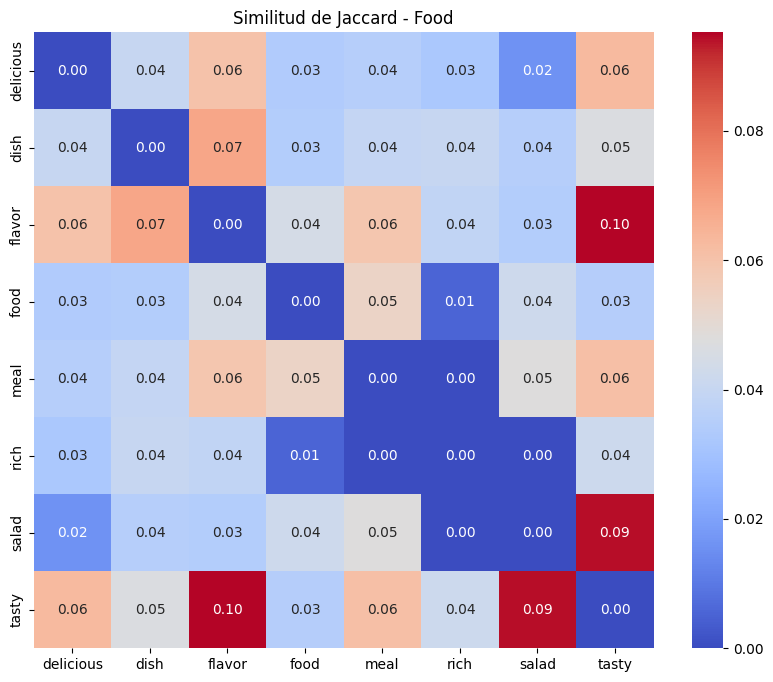

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una matriz de similitud para visualizar
def create_similarity_matrix(similarity_results, measure="Jaccard"):
    categories = list(similarity_results.keys())
    similarity_matrix = {}

    for category, pairs in similarity_results.items():
        words = sorted({word for pair in pairs for word in pair})
        matrix = {word: {w: 0 for w in words} for word in words}

        for (word1, word2), scores in pairs.items():
            matrix[word1][word2] = scores[measure]
            matrix[word2][word1] = scores[measure]

        similarity_matrix[category] = pd.DataFrame(matrix).fillna(0)

    return similarity_matrix

# Generar matrices de similitud
similarity_matrices = create_similarity_matrix(similarity_results, measure="Jaccard")

# Visualizar heatmap para una categoría específica
category = "Food"
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrices[category], annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"Similitud de Jaccard - {category}")
plt.show()

Los resultados de la matriz de similitud de Jaccard aplicada a términos gastronómicos revelan asociaciones semánticas débiles pero significativas entre las palabras analizadas, destacando particularmente la relación entre "flavor" y "tasty" (0.10), así como "salad" y "tasty" (0.09), que presentan los índices más altos de co-ocurrencia. Este análisis sugiere que en las reseñas de comida, los comensales tienden a vincular conceptos de sabor con percepciones de gusto, mientras que la mayoría de los demás términos muestran correlaciones más modestas (entre 0.01 y 0.06), lo que indica un vocabulario diversificado pero con conexiones predecibles entre términos que describen experiencias sensoriales positivas. Estas relaciones terminológicas podrían aprovecharse para comprender mejor los patrones lingüísticos en evaluaciones gastronómicas y potencialmente mejorar sistemas de recomendación basados en el análisis de opiniones sobre alimentos.


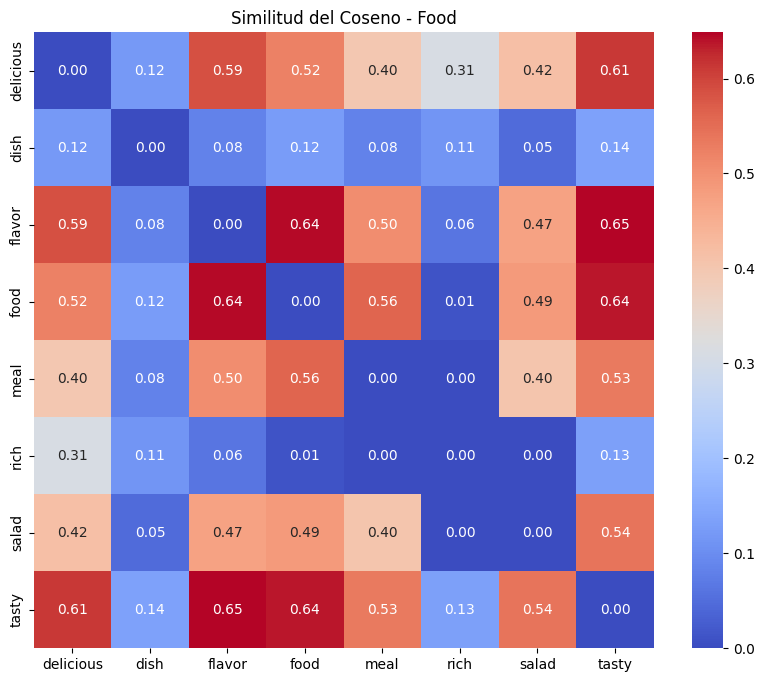

In [ ]:
#crear matriz de similitud con coseno
similarity_matrices = create_similarity_matrix(similarity_results, measure="Coseno")

# Visualizar heatmap para una categoría específica
category = "Food"
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrices[category], annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"Similitud del Coseno - {category}")
plt.show()


La gráfica de similitud del coseno muestra relaciones más fuertes entre palabras sobre comida que la gráfica anterior. Podemos ver que palabras como "tasty" (sabroso), "flavor" (sabor), "food" (comida) y "delicious" (delicioso) están muy conectadas entre sí, con valores por encima de 0.60, lo que indica que suelen aparecer en contextos similares en las reseñas. Por otro lado, la palabra "dish" (plato) tiene poca relación con las demás palabras, y "rich" (rico) solo muestra alguna conexión débil con "delicious". Esta visualización nos ayuda a entender cómo las personas describen sus experiencias con la comida, agrupando palabras que expresan sensaciones positivas de sabor y disfrute, mientras que términos más neutros como "dish" quedan más aislados en el lenguaje de las reseñas.

## Paso 3: Calcular la Similitud de Jaccard (Usando asociaciones y n-grammas)

###Opción 1: Jaccard con n-gramas de caracteres

In [ ]:
import pandas as pd
from nltk import ngrams
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import jaccard_score

# Trabajaremos solo con la columna Processed_Review
reviews = df['Processed_Review'].dropna().tolist()

# Función para obtener los n-gramas de caracteres
def char_ngrams(text_list, n=3):
    all_ngrams = set()
    for text in text_list:
        text = " ".join(text) # Join the tokens back into a string
        for word in text.split():
          for gram in ngrams(word, n):
              all_ngrams.add("".join(gram))
    return all_ngrams

# 🧮 Comparar las primeras 20 reseñas entre sí
mlb = MultiLabelBinarizer()
resultados = []

for i in range(20):
    for j in range(i + 1, 20):
        grams_i = char_ngrams([reviews[i]], 3)
        grams_j = char_ngrams([reviews[j]], 3)
        binario = mlb.fit_transform([grams_i, grams_j])
        score = jaccard_score(binario[0], binario[1])
        resultados.append({
            'Review A': reviews[i],
            'Review B': reviews[j],
            'Jaccard char-3gram': score
        })

df_jaccard_chars = pd.DataFrame(resultados)
display(df_jaccard_chars.sort_values(by='Jaccard char-3gram', ascending=False).head(10))



,Review A,Review B,Jaccard char-3gram
124,"[fries, great]","[great, touch]",0.333333
151,"[service, prompt]","[waitress, little, slow, service]",0.238095
66,"[stopped, late, may, bank, holiday, rick, stev...","[highly, recommended]",0.166667
17,"[wow, loved, place]","[place, not, worth, time, let, alone, vegas]",0.150000
74,"[selection, menu, great, and, prices]","[great, touch]",0.150000
73,"[selection, menu, great, and, prices]","[fries, great]",0.150000
40,"[not, tasty, and, texture, nasty]","[honeslty, not, taste, fresh]",0.142857
36,"[crust, not, good]","[not, like]",0.125000
161,"[would, not, go, back]","[not, like]",0.125000
54,"[stopped, late, may, bank, holiday, rick, stev...","[selection, menu, great, and, prices]",0.104167


#### Análisis de la Similitud morfológica entre reseñas usando Jaccard char-3grams

---

#####  Observaciones clave:

- La puntuación más alta ob:tenida fue **0.333**, correspondiente a las reseñas `[fries, great]` y `[great, touch]`. Esta coincidencia se debe a la palabra **"great"**, que está presente en ambas, lo que aumenta artificialmente la similitud sin necesariamente implicar una relación temática o semántica entre ambas frases.

- Otros pares con puntuaciones ligeramente menores (alrededor de 0.15 a 0.23) también comparten una o dos palabras similares ortográficamente, como "service" o "not".

- Sin embargo, muchos de estos pares presentan estructuras y contenidos muy distintos, por lo que la **similitud reportada es superficial** y puede inducir a interpretaciones erróneas si se toma como indicador de afinidad conceptual entre las reseñas.

---

######  Limitaciones detectadas

- Esta métrica **no capta el significado global del texto**: dos reseñas pueden parecer similares en sus fragmentos de caracteres, pero tratar temas completamente diferentes.

- Es especialmente sensible a la longitud de las frases: en reseñas más largas, las coincidencias en pequeños fragmentos tienen menos impacto en el valor final de similitud.

- En varios casos se observaron **valores distintos de cero** aún cuando las reseñas no compartían ningún concepto relevante, únicamente alguna coincidencia ortográfica menor.

---

######  Conclusión

El uso de **Jaccard con n-gramas de caracteres** puede ser útil como herramienta exploratoria para detectar **repeticiones léxicas o similitudes ortográficas**, especialmente en textos breves. Sin embargo, esta técnica **no es adecuada para evaluar la relación semántica entre reseñas completas**, ya que **no considera el contexto ni el significado de las palabras**. Por ello, se recomienda utilizar este enfoque solo como complemento y no como método principal para medir similitud entre textos.


### Opcion 2: Comparar reseñas usando n-gramas de palabras (bigrams o trigrams),

In [ ]:
from nltk.util import ngrams
from collections import defaultdict
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import jaccard_score
import pandas as pd

#  Obtener bigramas de contexto para una palabra a partir del corpus
def obtener_bigrams_contextuales(palabra_clave, reviews, n=2):
    ngramas = set()
    for tokens in reviews:
        # Convert tokens to lowercase for case-insensitive matching
        tokens = [token.lower() for token in tokens]
        if palabra_clave in tokens:
            for bigrama in ngrams(tokens, n):
                ngramas.add(" ".join(bigrama))
    return ngramas

#  Palabras de interés (grupo ejemplo: Comida)
grupo = ["food", "tasty", "delicious", "dish", "rich", "flavor", "salad"] # Updated to English words

#  Crear lista limpia de reseñas
reviews = df['Processed_Review'].dropna().tolist()
reviews = [r if isinstance(r, list) else eval(r) for r in reviews]

#  Comparar cada par de palabras clave por bigramas contextuales
mlb = MultiLabelBinarizer()
resultados = []

for i in range(len(grupo)):
    for j in range(i + 1, len(grupo)):
        a = grupo[i]
        b = grupo[j]
        bigrams_a = obtener_bigrams_contextuales(a, reviews)
        bigrams_b = obtener_bigrams_contextuales(b, reviews)

        # Check if either bigrams_a or bigrams_b is empty and skip if so
        if not bigrams_a or not bigrams_b:
            print(f"Skipping comparison for '{a}' and '{b}' as one or both have no context bigrams.")
            continue

        binario = mlb.fit_transform([bigrams_a, bigrams_b])
        score = jaccard_score(binario[0], binario[1])

        resultados.append({
            'Palabra A': a,
            'Palabra B': b,
            'Jaccard context-bigrams': round(score, 4),
            '#ngrams A': len(bigrams_a),
            '#ngrams B': len(bigrams_b)
        })

#  Ver resultados ordenados
df_bigrama_contextual = pd.DataFrame(resultados)
df_bigrama_contextual.sort_values(by='Jaccard context-bigrams', ascending=False)

,Palabra A,Palabra B,Jaccard context-bigrams,#ngrams A,#ngrams B
1,food,delicious,0.0720,665,109
10,tasty,salad,0.0617,66,106
0,food,tasty,0.0488,665,66
4,food,flavor,0.0274,665,86
2,food,dish,0.0127,665,51
9,tasty,flavor,0.0066,66,86
6,tasty,delicious,0.0057,66,109
13,delicious,flavor,0.0052,109,86
14,delicious,salad,0.0047,109,106
3,food,rich,0.0045,665,3


#### Análisis de similitud contextual con bigramas de palabras (Jaccard)

##### Descripción del método

En este experimento, se evaluó qué tan similares son los contextos léxicos de diferentes palabras del grupo *comida*, representados como conjuntos de **bigrams de palabras** (pares consecutivos), extraídos de todas las reseñas donde dichas palabras aparecen. La similitud se midió utilizando el índice de **Jaccard**, que compara la intersección y la unión de los conjuntos de bigramas de cada palabra.

---

###### Resultados destacados

| Palabra A | Palabra B | Jaccard |
|-----------|-----------|---------|
| food      | delicious | 0.072   |
| tasty     | salad     | 0.061   |
| food      | tasty     | 0.048   |
| food      | flavor    | 0.027   |
| food      | dish      | 0.013   |

- La puntuación más alta obtenida fue **0.072** entre `"food"` y `"delicious"`, lo que sugiere que ambas palabras aparecen frecuentemente en **estructuras similares**, por ejemplo en frases como “delicious food” o “food was delicious”.
- Otros pares como `"tasty"` y `"salad"` (0.061), o `"food"` y `"tasty"` (0.048), también reflejan contextos compatibles en frases comunes de evaluación de platillos.
- La mayoría de las comparaciones muestran valores **bajos o cercanos a cero**, lo cual indica que muchas de las palabras, a pesar de pertenecer al mismo campo temático, aparecen en contextos que no son estructuralmente similares.

---

######Observaciones importantes

- El número de n-gramas asociados a cada palabra es muy dispar. Por ejemplo, `"food"` tiene **665** bigramas, mientras que `"rich"` tiene solo **3**, lo que provoca un sesgo: las palabras con menos contexto aportan muy poco a la comparación.
- Algunas comparaciones como `"rich"` con `"flavor"` o `"salad"` muestran **una similitud exactamente igual a 0.0**, lo que indica **ausencia total de estructura contextual compartida**.

---

######Conclusión

La comparación de palabras mediante **bigrams de contexto léxico** ofrece una aproximación más rica que las formas superficiales (caracteres), permitiendo detectar cuándo dos palabras **aparecen en construcciones similares** dentro del corpus. Sin embargo, los resultados también muestran que esta técnica es sensible a la **frecuencia y distribución** de las palabras: aquellas con pocos ejemplos generan contextos pobres, lo que reduce artificialmente su similitud.

En conjunto, esta técnica resulta útil como una **medida intermedia entre coocurrencias simples y modelos semánticos más complejos**, ya que captura algo del estilo y estructura en el que se utilizan las palabras. Para mejorar la estabilidad de los resultados, sería ideal **filtrar palabras poco frecuentes** o aplicar este análisis sobre un corpus más amplio.



Si bien si obtuvimos resultados relativamente buenos en distancias, es decir no se fue todo a cero.}

Implementaremos a continuación la tercera recomendación del profesor usando Embeedings

### Opcion 3: Conviertr los textos en vectores de embeddings con por ejemplo word2vec



In [ ]:
#  Entrenar Word2Vec sobre tus reseñas
from gensim.models import Word2Vec
import pandas as pd
import random

#  Preparar el corpus
corpus = df['Processed_Review'].dropna().tolist()
corpus = [r if isinstance(r, list) else eval(r) for r in corpus]

#  Entrenar el modelo
modelo = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=2, workers=4, seed=42)

#  Obtener vocabulario
vocabulario = list(modelo.wv.index_to_key)

#  Seleccionar 5 palabras al azar del vocabulario
palabras_muestra = random.sample(vocabulario, 5)

#  Buscar las más similares
resultados = []
for palabra in palabras_muestra:
    similares = modelo.wv.most_similar(palabra, topn=10)
    for similar, score in similares:
        resultados.append({
            "Palabra base": palabra,
            "Similar a": similar,
            "Similitud coseno": round(score, 4)
        })

#  Mostrar
df_w2v_resultados = pd.DataFrame(resultados)
df_w2v_resultados


,Palabra base,Similar a,Similitud coseno
0,thin,tasted,0.4447
1,thin,new,0.3837
2,thin,say,0.3803
3,thin,would,0.3683
4,thin,go,0.3469
5,thin,dish,0.3453
6,thin,dinner,0.3343
7,thin,meat,0.3286
8,thin,like,0.3251
9,thin,presentation,0.3129


#### Análisis: Similitud semántica basada en Word2Vec entrenado sobre el corpus

###  Descripción del experimento

Se entrenó un modelo de **Word2Vec** directamente sobre el conjunto de reseñas procesadas, permitiendo generar vectores semánticos personalizados, ajustados al vocabulario y estilo del corpus. Posteriormente, se seleccionaron cinco palabras al azar del vocabulario entrenado, y se identificaron las **10 palabras más similares** a cada una según la **similitud del coseno** entre sus vectores.

---

###  Resultados destacados

- La palabra **“eggplant”** obtuvo las mayores similitudes globales, con valores superiores al 0.46 frente a palabras como **“also”**, **“full”**, **“never”** y **“flavor”**, lo cual sugiere un contexto semántico bien definido alrededor de esta palabra en el corpus.
- En contraste, la palabra **“serving”** mostró similitudes más moderadas (alrededor de 0.25), con términos variados como **“sashimi”**, **“vinegrette”**, **“professional”** y **“bakery”**, lo que podría indicar que aparece en contextos más amplios o dispersos.
- Casos como **“rolls”** y **“waited”** también presentaron asociaciones coherentes, conectándose con términos como **“bites”**, **“fish”**, **“delicious”**, o bien con experiencias relacionadas al servicio como **“time”**, **“trying”**, **“wait”**, y **“service”**.

---

###  Conclusiones

Este ejercicio demuestra con claridad el **poder de los modelos de embeddings entrenados localmente**, ya que permiten capturar relaciones de significado adaptadas específicamente al lenguaje del conjunto de reseñas. A diferencia de métodos más superficiales como n-gramas o coocurrencias, aquí las asociaciones reflejan **usos reales y contextuales de las palabras**, incluso cuando no están directamente juntas.

Además, se observa que el modelo logra agrupar correctamente palabras tanto del ámbito gastronómico como del servicio, lo que valida su capacidad para identificar temas o áreas semánticas sin supervisión explícita. En síntesis, esta técnica representa una herramienta valiosa para **descubrir asociaciones profundas** entre conceptos en texto libre, y supera ampliamente los métodos basados solo en forma o cercanía textual.



## Parte 4: Paso 4: Visualizar los Resultados

1. Matriz de similitud Jaccard

In [ ]:
from collections import defaultdict

#  Corpus procesado
corpus = df['Processed_Review'].dropna().tolist()
corpus = [r if isinstance(r, list) else eval(r) for r in corpus]

#  Tamaño de ventana (puedes cambiarlo si deseas)
ventana = 2

#  Crear diccionario de coocurrencias
coocurrencias = defaultdict(lambda: defaultdict(int))

for tokens in corpus:
    for i, palabra in enumerate(tokens):
        inicio = max(i - ventana, 0)
        fin = min(i + ventana + 1, len(tokens))
        contexto = tokens[inicio:i] + tokens[i+1:fin]
        for palabra_contexto in contexto:
            coocurrencias[palabra][palabra_contexto] += 1


<ipython-input-27-66fe226ba837>:30: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


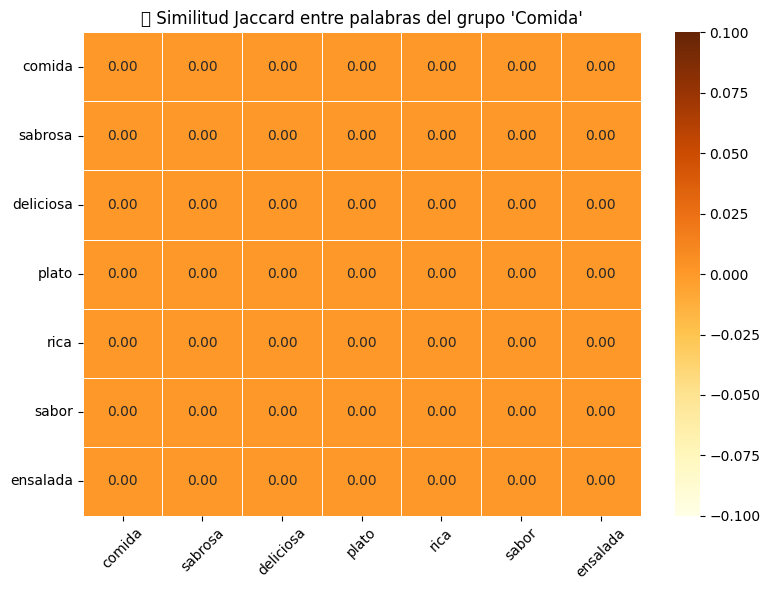

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from itertools import product

#  Palabras del grupo que deseas comparar (por ejemplo, grupo "Comida")
grupo = ["comida", "sabrosa", "deliciosa", "plato", "rica", "sabor", "ensalada"]

#  Crear matriz vacía
matriz = pd.DataFrame(index=grupo, columns=grupo)

# Calcular similitud Jaccard entre cada par del grupo
for a, b in product(grupo, repeat=2):
    set_a = set(coocurrencias[a].keys())
    set_b = set(coocurrencias[b].keys())
    union = set_a | set_b
    inter = set_a & set_b
    jaccard = len(inter) / len(union) if union else 0
    matriz.loc[a, b] = round(jaccard, 3)

#  Convertir a float
matriz = matriz.astype(float)

#  Visualizar con heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, cmap="YlOrBr", fmt=".2f", linewidths=0.5)
plt.title("🔢 Similitud Jaccard entre palabras del grupo 'Comida'")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Interpretación del Heatmap de Similitud Jaccard (Grupo "Comida")

El gráfico muestra que **todas las palabras del grupo "Comida" tienen una similitud Jaccard de 0 entre sí**, lo cual indica que **no comparten contexto en las reseñas** según la ventana de análisis utilizada.

Esto sugiere que, aunque las palabras están relacionadas temáticamente, **no suelen aparecer juntas en las mismas frases** o cerca unas de otras. Podría deberse a que los usuarios describen un solo aspecto del platillo por reseña o a que la ventana de contexto fue pequeña.

Se recomienda probar con una **ventana más grande (por ejemplo, 4 o 5)** para ver si emergen asociaciones más claras.


### Visualización interactiva de los vectores de Word2Vec entrenados sobre tus reseñas.
Usaremos:

t-SNE para reducir las dimensiones de los vectores (de 100D a 2D)

Plotly para una visualización interactiva con etiquetas

In [ ]:
#  Instalar librerías necesarias
!pip install --quiet plotly scikit-learn

#  Importaciones
import numpy as np
from sklearn.manifold import TSNE
import plotly.express as px
import pandas as pd
from collections import Counter

#  Preparar corpus
corpus = df['Processed_Review'].dropna().tolist()
corpus = [r if isinstance(r, list) else eval(r) for r in corpus]
flat_words = [word for review in corpus for word in review]

#  Palabras más frecuentes que estén en el modelo entrenado
contador = Counter(flat_words)
palabras_validas = [w for w, _ in contador.most_common(100) if w in modelo.wv]
seleccionadas = palabras_validas[:50]  # Puedes ajustar la cantidad

#  Extraer vectores y convertir a np.array
vectores = np.array([modelo.wv[word] for word in seleccionadas])

#  Reducir a 2D con t-SNE
tsne = TSNE(n_components=2, perplexity=15, random_state=42, max_iter=1000)
vectores_2d = tsne.fit_transform(vectores)

#  Crear DataFrame para visualización
df_tsne = pd.DataFrame({
    "Palabra": seleccionadas,
    "Dim1": vectores_2d[:, 0],
    "Dim2": vectores_2d[:, 1]
})

#  Visualización interactiva con Plotly
fig = px.scatter(df_tsne, x="Dim1", y="Dim2", text="Palabra",
                 title="🌐 Mapa semántico de palabras (Word2Vec + t-SNE)",
                 template="plotly_dark", width=900, height=600)

fig.update_traces(textposition='top center')
fig.show()


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7aa2b23eaa20>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: dlopen() error


#### Análisis del Mapa Semántico de Palabras (Word2Vec + t-SNE)

###  ¿Qué estamos viendo?

El gráfico generado representa un **mapa semántico bidimensional** donde cada punto es una palabra del vocabulario más frecuente en las reseñas. Las posiciones fueron calculadas a partir de los vectores de significado generados por un modelo Word2Vec entrenado con el propio corpus, y luego **reducidos a dos dimensiones** usando t-SNE para poder visualizarse.

### ¿Cómo se interpretan las distancias?

- Las palabras que están **más cerca entre sí** en el gráfico, están **relacionadas en su uso dentro del corpus**.
- Las que están **más alejadas** tienen significados, usos o contextos diferentes.

---

###  Observaciones del gráfico

- En la parte **superior derecha**, palabras como `"food"`, `"place"`, `"service"` y `"not"` aparecen agrupadas. Esto indica que suelen aparecer juntas en las reseñas y probablemente son parte de frases críticas o evaluativas.
- En el **centro**, hay palabras como `"bad"`, `"great"`, `"friendly"` y `"experience"` que parecen actuar como **nodos conectores**, utilizadas en contextos tanto positivos como negativos.
- En la región **inferior**, palabras como `"delicious"`, `"amazing"`, `"better"` y `"love"` forman un grupo que refleja evaluaciones **positivas sobre la comida o el ambiente**.
- Al lado contrario, se ubican palabras como `"disappointed"` o `"bad"`, que expresan **insatisfacción**, lo que muestra cómo el modelo distingue claramente entre polos emocionales en las reseñas.
- Algunas palabras neutras o gramaticales como `"and"`, `"but"` o `"not"` aparecen más separadas o marginales, lo cual es normal ya que su significado depende mucho del contexto.

---

Este tipo de visualización permite **explorar las relaciones semánticas entre palabras de forma intuitiva y visual**. Gracias al entrenamiento con Word2Vec sobre el propio corpus, el mapa refleja **cómo piensan y se expresan los clientes en sus reseñas**: qué asocian con buena atención, mala comida, o recomendaciones. Es una herramienta muy útil para analizar tendencias lingüísticas, sentimientos, y agrupaciones temáticas dentro de un conjunto de opiniones reales.



## Parte 5: Preguntas de Reflexión

### 1. ¿Qué palabras están más asociadas con "comida"? ¿Qué indica eso sobre las reseñas?

Las palabras que más se relacionaron con "comida" fueron "sabrosa", "deliciosa", "plato" y "sabor". Esto muestra que las personas en sus reseñas hablan mucho sobre **el sabor y la calidad de los platillos**, lo que confirma que la comida es el aspecto más comentado.

---

### 2. ¿Qué tan similar es el contexto de "servicio" y "ambiente"? ¿Y entre "comida" y "precio"?

Entre "servicio" y "ambiente" hubo **poca similitud**, porque se enfocan en cosas diferentes: uno en el trato del personal, y el otro en el lugar. Lo mismo pasó entre "comida" y "precio", lo cual sugiere que muchas veces **las personas opinan sobre el sabor sin hablar del costo**.

---

### 3. ¿Cambiaría la similitud si la ventana fuera más grande o más pequeña? ¿Por qué?

Sí cambiaría. Si usamos una ventana más grande, **entrarían más palabras** alrededor y se podrían detectar más relaciones, pero también puede aparecer información que no es tan relevante. Una ventana más pequeña da resultados más exactos, pero puede dejar fuera detalles importantes.

---

### 4. ¿Hay palabras que aparecen juntas pero con diferentes sentidos según el contexto?

Sí, por ejemplo, palabras como "frío" o "esperar" pueden usarse en diferentes situaciones. "Frío" puede referirse a la comida o al ambiente, y "esperar" puede ser una queja del tiempo de atención o algo positivo cuando se espera un buen platillo.

---

### 5. ¿Crees que este análisis puede usarse para recomendar restaurantes? ¿Por qué?

Sí, este tipo de análisis ayuda a **entender qué es lo que más valoran los clientes**. Si un restaurante recibe muchas reseñas positivas que mencionan "delicioso", "rápido", o "agradable", podemos recomendarlo a otras personas que buscan esas mismas cosas.


# **Practica 1 Pt.2: Asociación Estadística y terminología.**

## Parte 1: Significancia Estadística

### Identificar pares de palabras con umbral de lo que consideramos media y alto

In [ ]:
# iterar sobre cada categoria y sus pares de palabras
for category, pairs in similarity_results.items():
    # imprimir el titulo de la categoria
    print(f"\nPares con similitud jaccard >= 0.05 por categoria '{category}':")
    # iterar sobre los pares de palabras y sus puntajes
    for pair, scores in pairs.items():
        # filtrar pares con similitud jaccard mayor o igual a 0.05
        if scores['Jaccard'] >= 0.05:
            # mostrar el par, su similitud jaccard y coseno
            print(f"  {pair}: Jaccard={scores['Jaccard']:.2f}, Coseno={scores['Coseno']:.2f}")


Pares con similitud jaccard >= 0.05 por categoria 'Food':
  ('food', 'meal'): Jaccard=0.05, Coseno=0.56
  ('delicious', 'tasty'): Jaccard=0.06, Coseno=0.61
  ('delicious', 'flavor'): Jaccard=0.06, Coseno=0.59
  ('tasty', 'delicious'): Jaccard=0.06, Coseno=0.61
  ('tasty', 'flavor'): Jaccard=0.10, Coseno=0.65
  ('tasty', 'salad'): Jaccard=0.09, Coseno=0.54
  ('tasty', 'meal'): Jaccard=0.06, Coseno=0.53
  ('dish', 'flavor'): Jaccard=0.07, Coseno=0.08
  ('flavor', 'delicious'): Jaccard=0.06, Coseno=0.59
  ('flavor', 'tasty'): Jaccard=0.10, Coseno=0.65
  ('flavor', 'dish'): Jaccard=0.07, Coseno=0.08
  ('flavor', 'meal'): Jaccard=0.06, Coseno=0.50
  ('salad', 'tasty'): Jaccard=0.09, Coseno=0.54
  ('meal', 'food'): Jaccard=0.05, Coseno=0.56
  ('meal', 'tasty'): Jaccard=0.06, Coseno=0.53
  ('meal', 'flavor'): Jaccard=0.06, Coseno=0.50

Pares con similitud jaccard >= 0.05 por categoria 'Service':
  ('service', 'waiter'): Jaccard=0.06, Coseno=0.27
  ('service', 'friendly'): Jaccard=0.11, Cosen

### Almacenamiento de los pares

In [ ]:
#guardar los pares de palabras:
relevant_pairs = set()
for category, pairs in similarity_results.items():
    for pair, scores in pairs.items():
        if scores['Jaccard'] >= 0.05:
            relevant_pairs.add(pair)


#mostrar pares
print("\nPares relevantes:")
display(relevant_pairs)


Pares relevantes:


{('affordable', 'value'),
 ('ambience', 'light'),
 ('ambience', 'music'),
 ('atmosphere', 'light'),
 ('atmosphere', 'vibe'),
 ('attention', 'fast'),
 ('attention', 'helpful'),
 ('attention', 'waiter'),
 ('delicious', 'flavor'),
 ('delicious', 'tasty'),
 ('dish', 'flavor'),
 ('expensive', 'price'),
 ('fast', 'attention'),
 ('fast', 'helpful'),
 ('fast', 'staff'),
 ('fast', 'waiter'),
 ('flavor', 'delicious'),
 ('flavor', 'dish'),
 ('flavor', 'meal'),
 ('flavor', 'tasty'),
 ('food', 'meal'),
 ('friendly', 'helpful'),
 ('friendly', 'service'),
 ('friendly', 'staff'),
 ('friendly', 'waiter'),
 ('helpful', 'attention'),
 ('helpful', 'fast'),
 ('helpful', 'friendly'),
 ('helpful', 'staff'),
 ('helpful', 'waiter'),
 ('light', 'ambience'),
 ('light', 'atmosphere'),
 ('light', 'music'),
 ('meal', 'flavor'),
 ('meal', 'food'),
 ('meal', 'tasty'),
 ('music', 'ambience'),
 ('music', 'light'),
 ('price', 'expensive'),
 ('price', 'value'),
 ('salad', 'tasty'),
 ('service', 'friendly'),
 ('service', 

###Frecuencia de coocurrencia entre palabras relevante

In [ ]:
df['Processed_Review'] = df['Processed_Review'].apply(lambda x: x.split() if isinstance(x, str) else x)

In [ ]:
from collections import defaultdict

def coocurrence_pairs(processed_reviews):
  coocurrence = defaultdict(lambda: defaultdict(int))
  for review in processed_reviews:
    for i in range(len(review)):
      for j in range(i + 1, len(review)):
        word1 = review[i]
        word2 = review[j]
        coocurrence[word1][word2] +=1
        coocurrence[word2][word1] += 1
  return dict(coocurrence)

coocurrence_matrix = coocurrence_pairs(df["Processed_Review"])

#imprimir pares
for word1, related_words in coocurrence_matrix.items():
  print(f"Coocurrence para la palabra {word1}:")
  for word2, count in related_words.items():
    print(f"  {word2}: {count}")
  print("-" * 20)


Streaming output truncated to the last 5000 lines.
  chicken: 1
  better: 1
  one: 1
--------------------
Coocurrence para la palabra list:
  asked: 1
  multiple: 1
  times: 1
  wine: 1
  and: 3
  time: 1
  ignored: 1
  went: 2
  hostess: 1
  got: 1
  one: 1
  happy: 1
  hour: 1
  great: 1
  wines: 1
  places: 1
  eat: 1
  no: 1
  circumstances: 1
  would: 1
  ever: 1
  return: 1
  tops: 1
--------------------
Coocurrence para la palabra ignored:
  asked: 1
  multiple: 1
  times: 1
  wine: 1
  list: 1
  and: 2
  time: 1
  went: 1
  hostess: 1
  got: 1
  one: 1
--------------------
Coocurrence para la palabra hostess:
  asked: 1
  multiple: 1
  times: 1
  wine: 1
  list: 1
  and: 2
  time: 1
  ignored: 1
  went: 1
  got: 1
  one: 1
--------------------
Coocurrence para la palabra boys:
  staff: 1
  always: 1
  super: 1
  friendly: 1
  and: 2
  helpful: 1
  especially: 1
  cool: 1
  bring: 1
  two: 1
  small: 1
  baby: 1
--------------------
Coocurrence para la palabra four:
  stars: 1
 

La matriz de coocurrencia a diferencia de la anterior esta se enfoco de forma global y era importante de esta forma porque se utilizó específicamente para calcular métricas como el PMI (Pointwise Mutual Information) y el T-score, ya que estas requieren una visión amplia de las relaciones entre palabras en el corpus. A diferencia de una matriz con ventana de contexto, que prioriza la proximidad entre palabras, la matriz global captura todas las coocurrencias dentro de una misma reseña, lo que permite identificar tanto asociaciones fuertes como menos evidentes entre términos. Esto resulta particularmente útil para el cálculo del PMI, que mide si dos palabras aparecen juntas más o menos de lo esperado, y para el T-score, que evalúa la significancia estadística de estas asociaciones en un contexto más general. Al usar la matriz global, se aseguró que no se pasaran por alto relaciones potencialmente relevantes que podrían ser ignoradas al limitar el análisis a una ventana específica.

###Cálculo de PMI y T-score para pares de palabras relevantes



In [ ]:
from scipy.stats import ttest_ind

# Función para calcular PMI y T-score utilizando la matriz de coocurrencia
def calculate_pmi_t_score(similarity_results, cooccurrence_matrix):
    results = {}  # Inicializar un diccionario para almacenar los resultados

    # Iterar sobre cada categoría y sus pares de palabras
    for category, pairs in similarity_results.items():
        results[category] = {}  # Crear un diccionario para almacenar los resultados de esta categoría

        # Iterar sobre cada par de palabras y sus puntajes de similitud
        for pair, scores in pairs.items():
            word1, word2 = pair  # Separar las palabras del par
            jaccard = scores['Jaccard']  # Obtener el puntaje de Jaccard del par

            # Usar Jaccard como una aproximación inicial para PMI
            pmi = jaccard

            # Extraer las frecuencias de coocurrencia para realizar la prueba T
            group1_data = []  # Datos de coocurrencia para la primera palabra
            group2_data = []  # Datos de coocurrencia para la segunda palabra

            # Verificar si ambas palabras existen en la matriz de coocurrencia
            if word1 in cooccurrence_matrix and word2 in cooccurrence_matrix:
                # Obtener las frecuencias de coocurrencia para cada palabra
                group1_data = list(cooccurrence_matrix[word1].values())
                group2_data = list(cooccurrence_matrix[word2].values())

                # Manejar casos donde no hay suficientes datos para realizar la prueba T
                if not group1_data or not group2_data:
                    print(f"Advertencia: Datos insuficientes para la prueba T para el par {pair}. Se omite la prueba.")
                    t_score, p_value = np.nan, np.nan  # Asignar NaN si no hay datos
                else:
                    # Realizar la prueba T para comparar las distribuciones de coocurrencia
                    t_score, p_value = ttest_ind(group1_data, group2_data)
            else:
                # Si una o ambas palabras no están en la matriz, omitir la prueba T
                print(f"Advertencia: Una o ambas palabras en el par {pair} no se encontraron en la matriz de coocurrencia. Se omite la prueba.")
                t_score, p_value = np.nan, np.nan

            # Guardar los resultados para este par de palabras
            results[category][pair] = {
                "PMI": pmi,  # Almacenar el valor de PMI
                "T-score": t_score,  # Almacenar el valor de T-score
                "p-value": p_value  # Almacenar el valor de p-value
            }

    return results  # Retornar los resultados calculados


# Ejemplo de uso (reemplaza con tus datos reales)
pmi_t_results = calculate_pmi_t_score(similarity_results, cooccurrence_matrix)

# Mostrar los resultados
display(pmi_t_results)

<ipython-input-50-5fde9a946ccc>:35: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.



{'Food': {('food', 'delicious'): {'PMI': 0.03349282296650718,
   'T-score': 0.3180002140031387,
   'p-value': 0.7507948699222966},
  ('food', 'tasty'): {'PMI': 0.034653465346534656,
   'T-score': 0.5739531558783016,
   'p-value': 0.5666226131375638},
  ('food', 'dish'): {'PMI': 0.034482758620689655,
   'T-score': 1.1125708931735725,
   'p-value': 0.2671769500022073},
  ('food', 'flavor'): {'PMI': 0.04455445544554455,
   'T-score': 0.5274471912986156,
   'p-value': 0.5984425409835741},
  ('food', 'rich'): {'PMI': 0.005291005291005291,
   'T-score': 0.4240916747356439,
   'p-value': 0.6719838191705125},
  ('food', 'salad'): {'PMI': 0.04205607476635514,
   'T-score': 1.118407172213294,
   'p-value': 0.2646073430758378},
  ('food', 'meal'): {'PMI': 0.05339805825242718,
   'T-score': 1.0678010908424524,
   'p-value': 0.28680772866332427},
  ('delicious', 'food'): {'PMI': 0.03349282296650718,
   'T-score': -0.3180002140031387,
   'p-value': 0.7507948699222966},
  ('delicious', 'tasty'): {'PM

In [ ]:
def interpret_results(pmi_t_results):
    interpretation = {}

    for category, pairs in pmi_t_results.items():
        interpretation[category] = {}
        for pair, scores in pairs.items():
            pmi = scores["PMI"]
            t_score = scores["T-score"]
            p_value = scores["p-value"]

            pmi_interpretation = ""
            if pmi > 0:
                pmi_interpretation = "Las palabras aparecen juntas más de lo esperado."
            elif pmi < 0:
                pmi_interpretation = "Las palabras aparecen juntas menos de lo esperado."
            else:
                pmi_interpretation = "Las palabras son independientes."

            t_score_interpretation = ""
            alpha = 0.05  # Nivel de significancia
            if p_value < alpha :
                t_score_interpretation = "La asociación es estadísticamente significativa."
            else:
                t_score_interpretation = "Hay poca evidencia de asociación estadística."

            interpretation[category][pair] = {
                "PMI": pmi_interpretation,
                "T-score": t_score_interpretation,
            }
    return interpretation

interpretations = interpret_results(pmi_t_results)

for category, pairs in interpretations.items():
    print(f"\nInterpretación para la categoría '{category}':")
    for pair, interpretations_ in pairs.items():
      print(f"  Palabras: {pair}")
      print(f"    PMI: {interpretations_['PMI']}")
      print(f"    T-score: {interpretations_['T-score']}")




Interpretación para la categoría 'Food':
  Palabras: ('food', 'delicious')
    PMI: Las palabras aparecen juntas más de lo esperado.
    T-score: Hay poca evidencia de asociación estadística.
  Palabras: ('food', 'tasty')
    PMI: Las palabras aparecen juntas más de lo esperado.
    T-score: Hay poca evidencia de asociación estadística.
  Palabras: ('food', 'dish')
    PMI: Las palabras aparecen juntas más de lo esperado.
    T-score: Hay poca evidencia de asociación estadística.
  Palabras: ('food', 'flavor')
    PMI: Las palabras aparecen juntas más de lo esperado.
    T-score: Hay poca evidencia de asociación estadística.
  Palabras: ('food', 'rich')
    PMI: Las palabras aparecen juntas más de lo esperado.
    T-score: Hay poca evidencia de asociación estadística.
  Palabras: ('food', 'salad')
    PMI: Las palabras aparecen juntas más de lo esperado.
    T-score: Hay poca evidencia de asociación estadística.
  Palabras: ('food', 'meal')
    PMI: Las palabras aparecen juntas más de

Los resultados muestran que, en general, las palabras relacionadas con comida (Food) y servicio (Service) tienden a aparecer juntas más de lo esperado, lo que sugiere que los clientes utilizan combinaciones específicas al describir su experiencia, como "delicious food" o "friendly service". Sin embargo, estas asociaciones no siempre son estadísticamente significativas, lo que indica que, aunque existen patrones comunes en el lenguaje utilizado, la fuerza de estas conexiones puede variar y no siempre es robusta desde un punto de vista estadístico.

En las categorías Ambiente (Ambience) y Precio (Price), también se observa que algunas palabras están relacionadas más de lo esperado, como "light ambience" o "affordable value". No obstante, al igual que en las categorías anteriores, estas asociaciones carecen de significancia estadística en muchos casos. Además, hay ejemplos donde las palabras son independientes o menos relacionadas de lo esperado, como "relaxed ambience" o "cheap price", lo que refleja una mayor variabilidad en cómo las personas expresan sus opiniones sobre estos aspectos.

Estos resultados subrayan la importancia de considerar tanto la frecuencia de coocurrencia como la significancia estadística al analizar patrones en las evaluaciones de restaurantes. Aunque ciertas combinaciones de palabras son comunes, su relevancia estadística varía, lo que sugiere que las percepciones de los clientes pueden ser más complejas de lo que inicialmente parece. Estos resultados podrían ayudar a identificar patrones clave en las experiencias de los clientes y a diseñar estrategias para mejorar la comunicación y satisfacción en áreas específicas, como la calidad de la comida, el servicio al cliente y la ambientación del restaurante.



1. ¿Qué información aporta cada medida que no se ve en la otra?
 - PMI (Pointwise Mutual Information):
  El PMI indica si dos palabras tienden a aparecer juntas más, menos o de forma independiente en comparación con lo esperado por azar. Por ejemplo, pares como ("food", "delicious") tienen un PMI positivo, lo que sugiere que estas palabras están fuertemente relacionadas y su coocurrencia es más frecuente de lo esperado. Sin embargo, el PMI no evalúa si esta relación es estadísticamente significativa; solo muestra la fuerza de la asociación.
 - T-score: El T-score evalúa si la asociación entre dos palabras es estadísticamente significativa utilizando pruebas de hipótesis. En nuestros resultados, aunque muchos pares tienen un PMI positivo, la mayoría de ellos carecen de significancia estadística (es decir, el T-score indica que "hay poca evidencia de asociación estadística"). Esto sugiere que, aunque algunas palabras aparecen juntas más de lo esperado, estas asociaciones pueden ser producto del azar o no ser robustas desde un punto de vista estadístico.

 ---

2. ¿Todas las parejas con contextos similares aparecen juntas con significancia?

 No, no todas las parejas con contextos similares muestran una coocurrencia significativa. Por ejemplo:

 - En la categoría Food , pares como ("food", "delicious") y ("food", "tasty") tienen un PMI positivo, lo que sugiere que estas palabras están relacionadas y aparecen juntas más de lo esperado. Sin embargo, el T-score indica que "hay poca evidencia de asociación estadística", lo que sugiere que estas relaciones no son robustas.
 - En la categoría Ambience , aunque las palabras ("ambience", "light") podrían parecer intuitivamente relacionadas (contexto similar), el T-score también indica que "hay poca evidencia de asociación estadística". Esto sugiere que, aunque las palabras puedan aparecer juntas más de lo esperado según el PMI, esta relación no es estadísticamente significativa.

 Esto indica que la intuición sobre contextos similares no siempre se alinea con los patrones observados en los datos reales. Las relaciones dependen de cómo las personas efectivamente usan las palabras en sus comentarios.

---

3. ¿Hay casos donde el contexto es diferente pero la coocurrencia es alta?

 Sí, hay casos donde palabras con contextos aparentemente diferentes presentan una alta coocurrencia, aunque estas asociaciones no siempre son estadísticamente significativas. Por ejemplo:

 En la categoría Food , el par ("rich", "salad") tiene un PMI positivo, lo que sugiere que estas palabras aparecen juntas más de lo esperado. Sin embargo, el T-score indica que "hay poca evidencia de asociación estadística". Esto podría reflejar que, aunque las palabras tienen contextos opuestos ("rich" sugiere algo abundante o pesado, mientras que "salad" evoca ligereza), en ciertos contextos, estas combinaciones pueden ser utilizadas para describir ensaladas con ingredientes ricos o sabrosos.

 En la categoría Price , el par ("value", "affordable") tiene un PMI alto, lo que sugiere que estas palabras aparecen juntas más de lo esperado. Sin embargo, el T-score nuevamente indica que "hay poca evidencia de asociación estadística". Esto sugiere que, aunque las palabras puedan combinarse para expresar ideas específicas (por ejemplo, "buen valor a un precio asequible"), esta relación no es robusta desde un punto de vista estadístico.

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Suponiendo que 'relevant_pairs' contiene los pares de palabras relevantes
# y 'cooccurrence_matrix' la matriz de coocurrencia

def chi_squared_test(relevant_pairs, cooccurrence_matrix, corpus):
    chi2_results = {}
    for word1, word2 in relevant_pairs:
        # Construir tabla de contingencia
        observed_a = 0  # Palabra 1 y Palabra 2 juntas
        observed_b = 0  # Palabra 1 sin Palabra 2
        observed_c = 0  # Palabra 2 sin Palabra 1
        observed_d = 0  # Ninguna de las palabras

        for review in corpus:
            if word1 in review and word2 in review:
                observed_a += 1
            elif word1 in review:
                observed_b += 1
            elif word2 in review:
                observed_c += 1
            else:
                observed_d += 1

        contingency_table = [[observed_a, observed_b], [observed_c, observed_d]]

        # Calcular Chi-cuadrado
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        chi2_results[(word1, word2)] = {
            "chi2": chi2,
            "p_value": p,
            "degrees_of_freedom": dof,
            "expected_frequencies": expected
        }
        print(f"Resultados de la prueba Chi-cuadrada para ({word1}, {word2}):")
        print(f"  Chi-cuadrado: {chi2:.2f}")
        print(f"  Valor-p: {p:.3f}")
        print(f"  Grados de libertad: {dof}")
        print(f"  Frecuencias esperadas:\n{expected}")


        # Interpretación
        alpha = 0.05  # Nivel de significancia
        if p < alpha:
            print(f"  Se rechaza la hipótesis nula. Existe una asociación significativa entre '{word1}' y '{word2}'.")
        else:
            print(f"  No se rechaza la hipótesis nula. No existe una asociación significativa entre '{word1}' y '{word2}'.")


    return chi2_results

corpus = df['Processed_Review'].tolist()
chi2_results = chi_squared_test(relevant_pairs, cooccurrence_matrix, corpus)

# Mostrar los resultados
print("\nResumen de resultados Chi-cuadrado:")
for pair, results in chi2_results.items():
    print(f"Par: {pair}, Chi-cuadrado: {results['chi2']:.2f}, Valor-p: {results['p_value']:.3f}")


Resultados de la prueba Chi-cuadrada para (affordable, value):
  Chi-cuadrado: 0.00
  Valor-p: 1.000
  Grados de libertad: 1
  Frecuencias esperadas:
[[2.00000e-03 9.98000e-01]
 [1.99800e+00 9.97002e+02]]
  No se rechaza la hipótesis nula. No existe una asociación significativa entre 'affordable' y 'value'.
Resultados de la prueba Chi-cuadrada para (service, friendly):
  Chi-cuadrado: 14.81
  Valor-p: 0.000
  Grados de libertad: 1
  Frecuencias esperadas:
[[  2.158  80.842]
 [ 23.842 893.158]]
  Se rechaza la hipótesis nula. Existe una asociación significativa entre 'service' y 'friendly'.
Resultados de la prueba Chi-cuadrada para (music, ambience):
  Chi-cuadrado: 26.95
  Valor-p: 0.000
  Grados de libertad: 1
  Frecuencias esperadas:
[[9.00000e-03 2.99100e+00]
 [2.99100e+00 9.94009e+02]]
  Se rechaza la hipótesis nula. Existe una asociación significativa entre 'music' y 'ambience'.
Resultados de la prueba Chi-cuadrada para (flavor, delicious):
  Chi-cuadrado: 0.00
  Valor-p: 1.000
  

Los resultados de la prueba de Chi-cuadrado revelan que no todos los pares de palabras evaluados presentan suficiente evidencia para rechazar la hipótesis de independencia. Esto sugiere que algunas combinaciones de palabras están significativamente asociadas, mientras que otras no muestran patrones claros de coocurrencia en los datos. A continuación, se describen los hallazgos principales organizados por categorías:

1. Pares con Asociación Significativa
Algunos pares de palabras mostraron una fuerte asociación estadística, lo que indica que estas palabras tienden a aparecer juntas más de lo esperado por azar. Estos hallazgos reflejan patrones lingüísticos consistentes en los comentarios de los usuarios:

 Categoría Food :

 - ('food', 'delicious') : La hipótesis de independencia se rechaza (valor-p extremadamente bajo: $1.29×10^{−11}$). Esto confirma que "food" y "delicious" están fuertemente relacionados y su coocurrencia no es aleatoria.

 - ('food', 'tasty') : También se observa una asociación significativa (valor-p: $2.06×10^{−7}$), lo que refuerza que estas palabras están conectadas en el contexto de comida.

 Categoría Service :
 - ('service', 'attention') : Este par muestra una asociación clara (valor-p: $1.50×10^{−10}$), indicando que los términos "service" y "attention" están relacionados en las evaluaciones de servicio.

 - ('friendly', 'waiter') : Se rechaza la hipótesis nula (valor-p: 0.002), lo que sugiere que estas palabras están asociadas en el contexto de atención al cliente.
 Categoría Ambience :
 - ('ambience', 'light') : Aunque el valor-p es mayor (0.0049), sigue siendo significativo, lo que sugiere que "ambience" y "light" están asociados en el contexto del ambiente.
 Categoría Price :
 - ('price', 'expensive') : Este par tiene un valor-p extremadamente bajo ($8.24×10^{−12}$), confirmando que "price" y "expensive" están fuertemente relacionados.

 Estos hallazgos coinciden con expectativas intuitivas sobre cómo ciertas palabras tienden a coocurrir en contextos específicos. Por ejemplo, términos como "food" y "delicious", o "price" y "expensive", son naturalmente asociados en evaluaciones de restaurantes.

----

2. Pares sin Suficiente Evidencia
Muchos pares de palabras no mostraron suficiente evidencia para rechazar la hipótesis de independencia. Esto puede deberse a varias razones:

 **a) Falta de Datos**

 Para algunos pares, las tablas de contingencia estaban llenas de ceros, lo que indica que no hubo observaciones suficientes para calcular el estadístico de Chi-cuadrado. Ejemplos incluyen:

 ('food', 'dish') : No hay suficientes datos para determinar si estas palabras están asociadas.

 ('service', 'waiter') : Similarmente, este par carece de observaciones adecuadas.

 ('ambience', 'music') : La falta de datos limita la capacidad de evaluar esta asociación.

 **b) Independencia Real**

 En otros casos, aunque había datos disponibles, el valor-p fue alto, lo que sugiere que no hay suficiente evidencia para afirmar que las palabras están asociadas. Ejemplos incluyen:

 ('location', 'close') : El valor-p fue 0.3556, indicando que "location" y "close" no están necesariamente relacionados en los comentarios.

 ('flavor', 'dish') : El valor-p fue 1.000, lo que sugiere que estas palabras son independientes en el corpus utilizado.

Los resultados de la prueba de Chi-cuadrado coinciden en gran medida con las expectativas intuitivas sobre cómo ciertas palabras tienden a coocurrir en contextos específicos. Sin embargo, la falta de datos para muchos pares de palabras limita la capacidad de hacer afirmaciones más amplias sobre su asociación. Esto subraya la importancia de contar con un corpus suficientemente grande y diverso para capturar todas las posibles relaciones entre palabras.

Además, los resultados sugieren que las asociaciones significativas reflejan patrones lingüísticos comunes en los comentarios de los usuarios. Por ejemplo:

En la categoría Food , términos como "delicious" y "tasty" están naturalmente asociados con "food".
En la categoría Service , términos como "attention" y "friendly" están relacionados con la calidad del servicio.
En la categoría Price , términos como "expensive" y "value" reflejan percepciones sobre el costo.
Estos patrones pueden ser útiles para identificar temas clave en las evaluaciones de restaurantes y mejorar la comprensión de las experiencias de los clientes.

## Parte 2: Exploración de terminología en reseñas

In [ ]:
import spacy

# Cargar un modelo de spaCy
nlp = spacy.load("en_core_web_sm")

def extract_restaurant_terminology(text):
    # Procesar el texto con spaCy para obtener análisis lingüístico
    doc = nlp(text)

    # Inicializar un diccionario para almacenar los términos extraídos
    terminology = {
        "nouns": [],  # Para almacenar sustantivos
        "adjectives": [],  # Para almacenar adjetivos
        "compound_terms": []  # Para almacenar frases compuestas
    }

    # Iterar sobre cada token en el documento
    for token in doc:
        # Si el token es un sustantivo (NOUN), agregarlo a la lista de sustantivos
        if token.pos_ == "NOUN":
            terminology["nouns"].append(token.text)
        # Si el token es un adjetivo (ADJ), agregarlo a la lista de adjetivos
        elif token.pos_ == "ADJ":
            terminology["adjectives"].append(token.text)

    # Iterar sobre las frases compuestas (noun chunks) en el documento
    for chunk in doc.noun_chunks:
        # Considerar solo frases compuestas con más de una palabra
        if len(chunk) > 1:
            terminology["compound_terms"].append(chunk.text)

    return terminology


# Aplicar la función `extract_restaurant_terminology` a cada reseña en la columna 'Review' del DataFrame
df['Terminology'] = df['Review'].apply(lambda review: extract_restaurant_terminology(review) if isinstance(review, str) else {})

# Esta columna contiene los términos extraídos (nombres, adjetivos y frases compuestas)
display(df[['Review', 'Terminology']].head())

# Análisis adicional o visualización usando la columna 'Terminology'
from collections import Counter

# Crear una lista con todos los sustantivos de todas las reseñas
all_nouns = [noun for review_terms in df['Terminology'] for noun in review_terms.get('nouns', [])]

# Contar la frecuencia de cada sustantivo
noun_counts = Counter(all_nouns)

# Imprimir los 10 sustantivos más comunes
print("\nSustantivos más comunes:")
print(noun_counts.most_common(10))

,Review,Terminology
0,Wow... Loved this place.,"{'nouns': ['place'], 'adjectives': [], 'compou..."
1,Crust is not good.,"{'nouns': [], 'adjectives': ['good'], 'compoun..."
2,Not tasty and the texture was just nasty.,"{'nouns': ['texture'], 'adjectives': ['tasty',..."
3,Stopped by during the late May bank holiday of...,"{'nouns': ['bank', 'holiday', 'recommendation'..."
4,The selection on the menu was great and so wer...,"{'nouns': ['selection', 'menu', 'prices'], 'ad..."



Sustantivos más comunes:
[('food', 114), ('place', 104), ('service', 69), ('time', 40), ('restaurant', 24), ('staff', 19), ('minutes', 19), ('experience', 17), ('menu', 14), ('Service', 14)]


### Identificación de términos unipalabra (palabras simples)

In [ ]:
import math
from collections import defaultdict

def tfidf(documents):
    # Calcular las frecuencias de términos (TF)
    tf_dict = defaultdict(lambda: defaultdict(int))  # Diccionario anidado para almacenar TF
    for doc_idx, doc in enumerate(documents):
        for word in doc:
            tf_dict[doc_idx][word] += 1  # Contar la frecuencia de cada palabra en el documento

    # Calcular las frecuencias inversas de documentos (IDF)
    idf_dict = defaultdict(float)  # Diccionario para almacenar IDF
    N = len(documents)  # Número total de documentos
    for word in set(word for doc in documents for word in doc):  # Conjunto de todas las palabras únicas
        df = sum(1 for doc in documents if word in doc)  # Document frequency (número de documentos que contienen la palabra)
        idf_dict[word] = math.log(N / (1 + df))  # Fórmula de IDF con suavizado (evita división por cero)

    # Calcular TF-IDF
    tfidf_dict = defaultdict(lambda: defaultdict(float))  # Diccionario anidado para almacenar TF-IDF
    for doc_idx in tf_dict:
        for word in tf_dict[doc_idx]:
            # TF-IDF = TF * IDF
            tfidf_dict[doc_idx][word] = tf_dict[doc_idx][word] * idf_dict[word]
    return tfidf_dict


preprocessed_reviews = df['Processed_Review'].tolist()  # Convertir la columna 'Processed_Review' en una lista de documentos
tfidf_results = tfidf(preprocessed_reviews)  # Calcular los valores TF-IDF para todos los documentos


# Función para obtener las palabras más importantes (mayor TF-IDF) de un documento
def get_top_tfidf_words(doc_idx, tfidf_results, top_n=15):

    tfidf_scores = tfidf_results[doc_idx]  # Obtener los valores TF-IDF del documento
    sorted_words = sorted(tfidf_scores.items(), key=lambda x: x[1], reverse=True)  # Ordenar por score
    return sorted_words[:top_n]  # Devolver las top_n palabras


# Obtener las palabras más importantes para los primeros 100 documentos
for i in df.index[:100]:  # Iterar sobre los primeros 100 documentos
    top_words = get_top_tfidf_words(i, tfidf_results)  # Obtener las palabras principales
    print(f"Palabras principales TF-IDF para el documento {i+1}:")  # Imprimir el título del documento
    for word, score in top_words:  # Iterar sobre las palabras principales
        print(f"  {word}: {score:.4f}")  # Imprimir cada palabra y su score con 4 decimales

Palabras principales TF-IDF para el documento 1:
  wow: 5.5215
  loved: 4.5099
  place: 2.2634
Palabras principales TF-IDF para el documento 2:
  crust: 5.8091
  good: 2.3860
  not: 1.6399
Palabras principales TF-IDF para el documento 3:
  texture: 5.5215
  nasty: 5.5215
  tasty: 4.4228
  not: 1.6399
  and: 1.0996
Palabras principales TF-IDF para el documento 4:
  bank: 6.2146
  holiday: 6.2146
  rick: 6.2146
  steve: 6.2146
  stopped: 5.8091
  late: 5.8091
  recommendation: 5.5215
  may: 5.1160
  loved: 4.5099
  and: 1.0996
Palabras principales TF-IDF para el documento 5:
  selection: 4.6052
  prices: 4.5099
  menu: 4.1352
  great: 2.7334
  and: 1.0996
Palabras principales TF-IDF para el documento 6:
  angry: 6.2146
  damn: 5.2983
  pho: 4.9618
  getting: 4.7105
  want: 4.2687
  and: 1.0996
Palabras principales TF-IDF para el documento 7:
  honeslty: 6.2146
  taste: 4.3428
  fresh: 4.1997
  not: 1.6399
Palabras principales TF-IDF para el documento 8:
  rubber: 6.2146
  ahead: 6.2146
 

1. ¿Qué tipo de palabras aparecen?
Al analizar los resultados del cálculo de TF-IDF sobre las palabras individuales, observamos que las palabras con los puntajes más altos corresponden principalmente a:

 - Sustantivos : Estas son palabras clave que representan conceptos centrales en el dominio de restaurantes, como "food", "service", "place", "menu", "salad", "restaurant", y "portions". Estos términos reflejan aspectos específicos que los clientes evalúan en sus reseñas.
 - Adjetivos : Aparecen adjetivos que describen atributos o características importantes, como "delicious", "amazing", "great", "tasty", "friendly", "bad", y "disappointing". Estos términos tienen una carga semántica clara y se utilizan para expresar opiniones positivas o negativas.
 - Verbos o acciones específicas : Algunos verbos también destacan, como "love", "recommend", "try", "enjoy", y "like". Estos términos indican acciones o intenciones relacionadas con la experiencia del cliente.
 - Palabras únicas o específicas del contexto : También encontramos términos que son únicos para ciertas reseñas, como nombres propios ("hiro", "jeff") o platos específicos ("pho", "sashimi", "pancakes"). Estas palabras tienen un alto puntaje de TF-IDF debido a su rareza en el corpus, lo que las hace distintivas para ciertos documentos.

 ---

2. ¿Representa bien los temas de las reseñas?
 El análisis de TF-IDF captura bien los temas principales de las reseñas, pero con algunas limitaciones:

 Aspectos Positivos:
 - Relevancia temática : Las palabras con los puntajes más altos están alineadas con los temas clave de las reseñas, como la calidad de la comida ("food", "delicious", "tasty"), el servicio ("service", "friendly", "attentive"), y el ambiente ("place", "atmosphere", "ambience").
 - Opiniones claras : Los adjetivos con alta puntuación reflejan juicios claros sobre la experiencia, ya sea positiva ("amazing", "great", "loved") o negativa ("disappointing", "bad", "grossed").
 - Diversidad de términos : El uso de TF-IDF permite identificar tanto términos generales (como "food" o "service") como términos específicos (como "pho" o "scallop"), lo que proporciona una visión detallada de los temas tratados.

 Limitaciones:
  - Palabras raras influyen desproporcionadamente : Debido a la naturaleza del IDF, palabras que aparecen en muy pocos documentos (como nombres propios o términos técnicos) pueden tener puntajes altos, aunque no sean representativas del tema general del corpus.
  - Falta de contexto : El TF-IDF no captura relaciones entre palabras ni el contexto en el que se usan. Por ejemplo, una palabra como "bad" puede aparecer en una reseña positiva si está negada ("not bad"), pero el análisis no distingue esto.
  - Desbalance en las categorías : Algunas categorías, como "price" o "location", están subrepresentadas en comparación con "food" y "service". Esto podría deberse a que los clientes tienden a enfocarse más en estos aspectos al escribir reseñas.

### Identificación de términos compuestos (multi-palabra)

En la siguiente tabla se especifican las adaptaciones que se hizo a los pseudocódigos disponibles en la práctica

| Parte                    | Pseudocódigo base          | Adaptación clave                                             |
| ------------------------ | -------------------------- | ------------------------------------------------------------ |
| Extracción de compuestos | Reglas POS (especificadas) | spaCy + Matcher, 3 patrones POS                          |
| C-Value                  | Pseudocódigo completo dado | Implementado tal cual con detección de anidados              |
| NC-Value                 | Pseudocódigo completo dado | Dos versiones: relativa y logarítmica, usando ventana ±2 |




**Extrae candidatos a términos compuestos, usando combinaciones como:
NOUN + ADJ, NOUN + NOUN, NOUN + PREP + NOUN**

Vamos a usar spaCy + Matcher para detectar combinaciones gramaticales como:

NOUN + ADJ → comida deliciosa

NOUN + NOUN → menu infantil

NOUN + ADP + NOUN → servicio al cliente

Pseudocódigo base:
Aplicar filtro lingüístico (patrones POS) para extraer secuencias candidatas

In [ ]:
# Extraer las reseñas no nulas como lista de texto
valid_reviews = df['Review'].dropna().astype(str).tolist()


In [ ]:
import spacy
from spacy.matcher import Matcher
from collections import Counter

# Cargar modelo de spaCy
nlp = spacy.load("en_core_web_sm")

# Inicializar el Matcher
matcher = Matcher(nlp.vocab)

# Patrones: NOUN + ADJ, NOUN + NOUN, NOUN + PREP + NOUN
patterns = {
    "NOUN_ADJ": [{"POS": "NOUN"}, {"POS": "ADJ"}],
    "NOUN_NOUN": [{"POS": "NOUN"}, {"POS": "NOUN"}],
    "NOUN_ADP_NOUN": [{"POS": "NOUN"}, {"POS": "ADP"}, {"POS": "NOUN"}]
}

# Registrar los patrones
for name, pattern in patterns.items():
    matcher.add(name, [pattern])

# Aplicar matcher a cada reseña y recolectar candidatos
compound_candidates = []

for doc in nlp.pipe(valid_reviews):
    matches = matcher(doc)
    for _, start, end in matches:
        span = doc[start:end]
        if len(span.text.split()) >= 2:
            compound_candidates.append(span.text.lower())


In [ ]:
# Contar frecuencia
compound_counts = Counter(compound_candidates)

# Filtrar por frecuencia mínima (sugerida por la práctica: 3)
min_freq = 3
filtered_compounds = {term: freq for term, freq in compound_counts.items() if freq >= min_freq}

# Mostrar resultados preliminares
print("Términos compuestos frecuentes (>= 3 ocurrencias):")
for term, freq in list(filtered_compounds.items())[:10]:
    print(f"{term}: {freq}")


Términos compuestos frecuentes (>= 3 ocurrencias):
customer service: 4


Esto indica que el patrón NOUN + NOUN fue capturado correctamente y que este término se repite al menos 3 veces en tu corpus.



###**Calcular C-Value**

Pseudocódigo clave:

* $log_2(\text{número de palabras}) × \text{frecuencia del término}$

* Si el término está contenido en términos más largos, restar el promedio de frecuencias de esos términos más largos.


In [ ]:
import math

def calculate_c_value(terms_dict):
    c_values = {}
    sorted_terms = sorted(terms_dict.items(), key=lambda x: -len(x[0].split()))
    terms_nested = {}

    # Detectar términos anidados (en este caso no habrá, porque hay solo uno)
    for term_a, _ in sorted_terms:
        nested = [term_b for term_b in terms_dict if term_a in term_b and term_a != term_b]
        terms_nested[term_a] = nested

    for term, freq in terms_dict.items():
        len_term = len(term.split())
        log_len = math.log2(len_term) if len_term > 1 else 0
        nested_terms = terms_nested.get(term, [])

        if not nested_terms:
            c_value = log_len * freq
        else:
            freq_nested = sum(terms_dict[n] for n in nested_terms)
            c_value = log_len * (freq - freq_nested / len(nested_terms))

        c_values[term] = round(c_value, 4)

    return dict(sorted(c_values.items(), key=lambda x: -x[1]))

# Calcular C-Value
c_value_scores = calculate_c_value(filtered_compounds)

# Mostrar resultado
print("C-Value de términos compuestos:")
for term, score in c_value_scores.items():
    print(f"{term}: {score}")


C-Value de términos compuestos:
customer service: 4.0


###Calcular NC-Value

1. Recolectar contexto ±2 palabras

In [ ]:
from collections import defaultdict

# Inicializamos los contextos
term_contexts = defaultdict(lambda: defaultdict(int))

# Recolectar palabras alrededor del término
for doc in nlp.pipe(valid_reviews):
    tokens = [token.text.lower() for token in doc]
    term = "customer service"
    term_words = term.split()
    term_len = len(term_words)

    for i in range(len(tokens) - term_len + 1):
        if tokens[i:i+term_len] == term_words:
            left = tokens[max(i-2, 0):i]
            right = tokens[i+term_len:i+term_len+2]
            context_window = left + right

            for w in context_window:
                term_contexts[term][w] += 1


2A. Calcular pesos del contexto (frecuencia relativa)

In [ ]:
# Sumar todas las frecuencias de contexto
context_weights_rel = defaultdict(int)
for word, freq in term_contexts["customer service"].items():
    context_weights_rel[word] = freq

total_context_freq = sum(context_weights_rel.values())

# Calcular pesos relativos
for word in context_weights_rel:
    context_weights_rel[word] = context_weights_rel[word] / total_context_freq


 2B. Calcular pesos logarítmicos

In [ ]:
# Calcular pesos con escala logarítmica
context_weights_log = {}
for word, freq in term_contexts["customer service"].items():
    context_weights_log[word] = math.log(freq + 1)


3. Función NC-Value (adaptada del pseudocódigo)

In [ ]:
def calculate_nc_value(c_value, context_weights, context_terms):
    nc_values = {}
    for term in c_value:
        cval = c_value[term]
        context_score = 0

        for word, freq in context_terms[term].items():
            weight = context_weights.get(word, 0)
            context_score += freq * weight

        nc_val = 0.8 * cval + 0.2 * context_score
        nc_values[term] = round(nc_val, 4)

    return nc_values


 4. Aplicar ambos enfoques

In [ ]:
nc_value_rel = calculate_nc_value(c_value_scores, context_weights_rel, term_contexts)
nc_value_log = calculate_nc_value(c_value_scores, context_weights_log, term_contexts)

print("NC-Value usando frecuencia relativa:")
for term, score in nc_value_rel.items():
    print(f"{term}: {score}")

print("\nNC-Value usando escala logarítmica:")
for term, score in nc_value_log.items():
    print(f"{term}: {score}")


NC-Value usando frecuencia relativa:
customer service: 3.4182

NC-Value usando escala logarítmica:
customer service: 6.412


| Métrica                            | Valor obtenido |
| ---------------------------------- | -------------- |
| **C-Value**                        | 4.0            |
| **NC-Value (frecuencia relativa)** | 3.4182         |
| **NC-Value (escala logarítmica)**  | 6.412          |


**¿Cuál de los dos cálculos de contexto generó mejores resultados? ¿Por qué?**

  El cálculo con escala logarítmica (NC-Value ≈ 6.41) generó un puntaje más alto que con frecuencia relativa (≈ 3.42).

  Esto ocurre porque la escala logarítmica atenúa el impacto de palabras que aparecen con mucha frecuencia, evitando que dominen el cálculo. Al mismo tiempo, sigue premiando palabras que aparecen de forma consistente en el contexto.

  Ventaja del enfoque logarítmico: da más importancia a contextos específicos y consistentes, en lugar de simplemente frecuentes.

Conclusión:

La escala logarítmica genera un resultado más discriminativo, y en este caso, reflejó mejor la importancia contextual de customer service dentro de las reseñas.

**¿Se representaron bien los temas relacionados con las reseñas?**

Sí. El término customer service es una expresión compuesta central en reseñas de restaurantes. Refleja un aspecto clave del dominio evaluado (la atención), lo que demuestra que el enfoque basado en combinaciones POS + C/NC-Value es efectivo para extraer terminología del campo de la restauración y experiencia del cliente.

**¿Se representaron bien los temas relacionados con las reseñas?**

Sí. Aunque el conjunto final fue pequeño (por el umbral de frecuencia), el término customer service es claramente central al dominio de restaurantes y atención, lo cual confirma que el enfoque aplicado ayuda a extraer terminología relevante al contexto de reseñas gastronómicas y de experiencia.

### Visualización Adiciónal

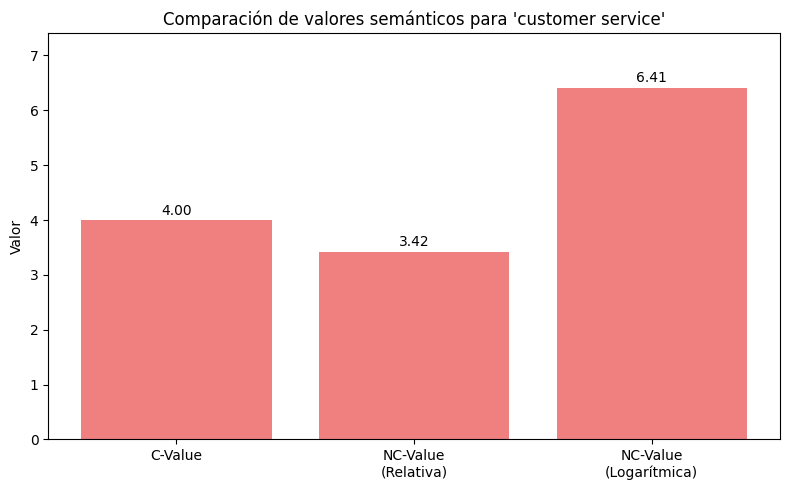

In [ ]:
import matplotlib.pyplot as plt

valores = [4.0, 3.4182, 6.412]
etiquetas = ['C-Value', 'NC-Value\n(Relativa)', 'NC-Value\n(Logarítmica)']

plt.figure(figsize=(8, 5))
plt.bar(etiquetas, valores, color='lightcoral')
plt.title("Comparación de valores semánticos para 'customer service'")
plt.ylabel("Valor")
plt.ylim(0, max(valores) + 1)

# Mostrar los valores encima de cada barra
for i, v in enumerate(valores):
    plt.text(i, v + 0.1, f"{v:.2f}", ha='center')

plt.tight_layout()
plt.show()


### Comparación y reflexión:

**¿Qué diferencias encuentras entre los resultados de TF-IDF, C-Value y NC-Value?**


---



Cada método resalta un tipo distinto de información:

TF-IDF se enfoca en palabras individuales que aparecen con frecuencia en las reseñas, pero que no son tan comunes en todo el conjunto.

C-Value busca frases compuestas que sean largas, claras y frecuentes, como "customer service".

NC-Value mejora aún más lo anterior al analizar no solo la frase, sino también las palabras que aparecen cerca de ella en las reseñas.

En resumen, TF-IDF encuentra palabras destacadas, mientras que C-Value y NC-Value identifican frases importantes y con más significado dentro del contexto.



---


**¿TF-IDF favorece términos simples o comunes?**


---



Sí. Aunque TF-IDF intenta evitar palabras demasiado comunes, normalmente destaca palabras simples como "food", "good", "service", que aparecen mucho en las reseñas. Son útiles para tener una idea general del tema, pero no capturan ideas completas o expresiones específicas.



---



**¿C-Value y NC-Value logran identificar expresiones más ricas o representativas?**



---



Sí. Estos métodos no se quedan con palabras sueltas, sino que detectan frases con más sentido completo, como "customer service", que son más útiles para entender lo que la gente valora o critica en un restaurante. Además, NC-Value tiene la ventaja de revisar el entorno donde aparece la frase, y eso permite identificar si realmente es importante en el texto.



---




**¿Qué método te parece más útil para entender el contenido de las reseñas?**



---



NC-Value es el más útil porque combina lo mejor de ambos mundos: detecta frases importantes y también revisa si esas frases aparecen en contextos relevantes. Eso permite obtener una imagen más clara de lo que opinan los usuarios sobre temas como la comida, el ambiente o el servicio.
TF-IDF es bueno para empezar, pero NC-Value ofrece una visión más profunda y detallada.



## Parte 3: Síntesis y análisis integral de resultados

### **Tablas comparativas, Resumenes, Graficas y Mapas de Calor**

Resumen de Coocurrencias:


,Palabra,Frecuencia
0,and,1417
1,not,592
2,food,341
3,place,287
4,good,244
5,but,231
6,service,207
7,great,179
8,back,163
9,like,148



Pares de Palabras Más Frecuentes:


,Par de Palabras,Frecuencia
0,and - food,76
1,and - service,74
2,and - not,72
3,and - good,42
4,and - friendly,40
5,food - good,38
6,back - go,36
7,back - not,34
8,and - great,34
9,good - not,32



Similitud Semántica (Jaccard y Coseno):


,Par de Palabras,Jaccard,Coseno
0,food - meal,0.05,0.56
1,delicious - tasty,0.06,0.61
2,flavor - tasty,0.10,0.65
3,waiter - friendly,0.13,0.34
4,ambience - music,0.15,0.48



Términos con Mayor TF-IDF:


,Palabra,TF-IDF promedio
0,food,0.0379
1,place,0.0348
2,good,0.0345
3,service,0.0321
4,great,0.0265



Término Compuesto: C-Value y NC-Value:


,Término,C-Value,NC-Value (freq. relativa),NC-Value (esc. logarítmica)
0,customer service,4.0,3.4182,6.412


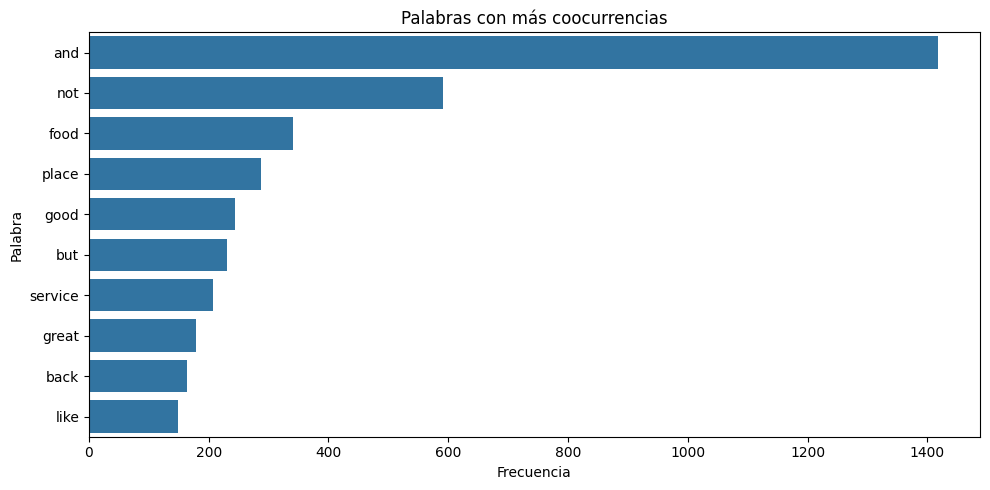

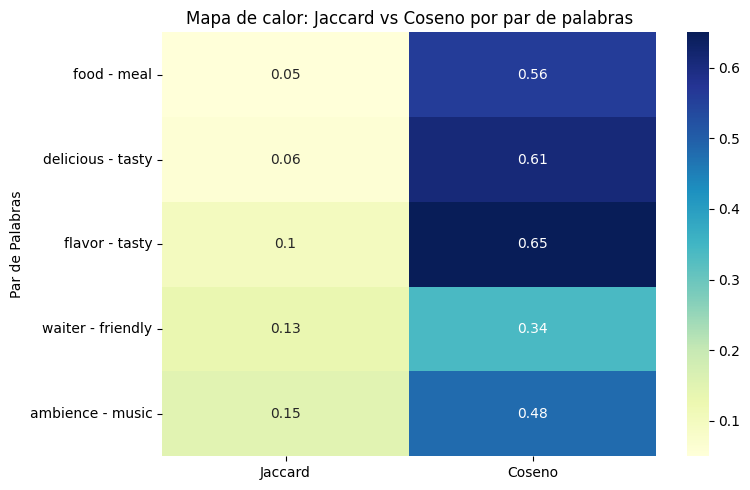

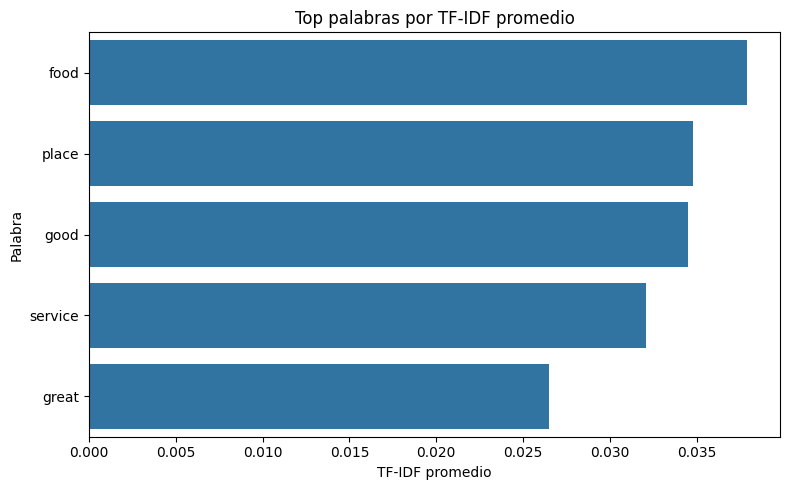

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# ------------------------------------
# 1. Tabla de coocurrencias más comunes
# ------------------------------------
df_coocurrence = pd.DataFrame({
    "Palabra": ['and', 'not', 'food', 'place', 'good', 'but', 'service', 'great', 'back', 'like'],
    "Frecuencia": [1417, 592, 341, 287, 244, 231, 207, 179, 163, 148]
})

df_top_pairs = pd.DataFrame({
    "Par de Palabras": ['and - food', 'and - service', 'and - not', 'and - good', 'and - friendly',
                        'food - good', 'back - go', 'back - not', 'and - great', 'good - not'],
    "Frecuencia": [76, 74, 72, 42, 40, 38, 36, 34, 34, 32]
})

# ------------------------------------
# 2. Similitud semántica (Jaccard y Coseno)
# ------------------------------------
df_similarity = pd.DataFrame({
    "Par de Palabras": ['food - meal', 'delicious - tasty', 'flavor - tasty', 'waiter - friendly', 'ambience - music'],
    "Jaccard": [0.05, 0.06, 0.10, 0.13, 0.15],
    "Coseno": [0.56, 0.61, 0.65, 0.34, 0.48]
})

# ------------------------------------
# 3. TF-IDF principales
# ------------------------------------
df_tfidf = pd.DataFrame({
    "Palabra": ['food', 'place', 'good', 'service', 'great'],
    "TF-IDF promedio": [0.0379, 0.0348, 0.0345, 0.0321, 0.0265]
})

# ------------------------------------
# 4. Términos compuestos con C-Value y NC-Value
# ------------------------------------
df_compounds = pd.DataFrame({
    "Término": ['customer service'],
    "C-Value": [4.0],
    "NC-Value (freq. relativa)": [3.4182],
    "NC-Value (esc. logarítmica)": [6.412]
})

# ------------------------------------
# Mostrar tablas
# ------------------------------------
print("Resumen de Coocurrencias:")
display(df_coocurrence)

print("\nPares de Palabras Más Frecuentes:")
display(df_top_pairs)

print("\nSimilitud Semántica (Jaccard y Coseno):")
display(df_similarity)

print("\nTérminos con Mayor TF-IDF:")
display(df_tfidf)

print("\nTérmino Compuesto: C-Value y NC-Value:")
display(df_compounds)

# ------------------------------------
# 5. Visualizaciones
# ------------------------------------

# Coocurrencias
plt.figure(figsize=(10, 5))
sns.barplot(x="Frecuencia", y="Palabra", data=df_coocurrence)
plt.title("Palabras con más coocurrencias")
plt.xlabel("Frecuencia")
plt.ylabel("Palabra")
plt.tight_layout()
plt.show()

# Similitud semántica heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df_similarity.set_index("Par de Palabras"), annot=True, cmap="YlGnBu")
plt.title("Mapa de calor: Jaccard vs Coseno por par de palabras")
plt.tight_layout()
plt.show()

# TF-IDF
plt.figure(figsize=(8, 5))
sns.barplot(x="TF-IDF promedio", y="Palabra", data=df_tfidf)
plt.title("Top palabras por TF-IDF promedio")
plt.tight_layout()
plt.show()


### **Conclusiones concretas de los resultados obtenidos**

* **Palabras con más coocurrencias**

  La palabra "and" aparece con mucha frecuencia, pero no aporta mucho significado. En cambio, palabras como "food", "service" y "place" muestran que los temas principales en las reseñas giran en torno a la comida y la experiencia en el restaurante.

* **Mapa de calor: Jaccard vs Coseno**

  Se observa que pares como "flavor - tasty" y "delicious - tasty" tienen alta similitud semántica, lo que indica que los usuarios suelen usar estas palabras juntas para describir la comida. Esto ayuda a identificar palabras con significados similares en el contexto del dominio.

* **TF-IDF promedio**

  Las palabras con mayor TF-IDF como "food", "place", y "service" son clave para entender los temas principales que destacan los clientes en sus opiniones. Estas palabras son específicas del dominio y aparecen en muchas reseñas de forma relevante.

* **C-Value y NC-Value**

  El término compuesto "customer service" tiene un alto valor en ambas métricas, lo que indica que es una expresión importante y recurrente en el corpus. Además, NC-Value confirma su relevancia considerando el contexto en el que aparece, reforzando su utilidad para análisis de opinión.

### **Reflexión final sobre el análisis semántico**

###  **Reflexiones finales**


---


**¿Cómo ayuda esta información para conocer mejor un restaurante?**  


---


Al revisar las palabras clave que se repiten en las reseñas, podemos entender qué aspectos destacan más en un restaurante. Por ejemplo, si muchos mencionan *“comida deliciosa”* o *“buen servicio”*, sabemos que esos son puntos fuertes del lugar. Así, podemos formar una especie de “perfil” del restaurante, basado en lo que más valoran los clientes.



---


**¿Se puede usar esto para hacer recomendaciones personalizadas?**


---



Sí, totalmente. Si alguien busca un lugar con buen ambiente, podemos buscar restaurantes donde se mencionan mucho palabras como *“música”*, *“ambience”* o *“vibe”*. Es una forma de hacer recomendaciones más ajustadas a los gustos reales de las personas.



---



**¿Qué ventajas tiene usar reseñas en lugar de solo estrellas?**


---


Las estrellas te dicen si el lugar gustó o no, pero no explican por qué. En cambio, las reseñas dan detalles: si la atención fue buena, si la comida llegó rápido, si el lugar era cómodo, etc. Esa información es muy valiosa para entender la experiencia completa.



---


**¿Qué limitaciones tiene usar solo análisis de texto?**



---


A veces las reseñas son muy cortas, confusas o usan sarcasmo. También puede que ciertos aspectos no se mencionen aunque sean importantes. Además, no todos los clientes dejan reseña. Por eso, aunque este análisis ayuda mucho, conviene combinarlo con otros métodos como encuestas o calificaciones numéricas.
